# Online Shoppers Purchasing Intention Dataset

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

I. Exploratory Data Analysis (EDA)

   1. Exploration of Categorical Variables
   2. Visualize the Distribution of Categorical Variables
   3. Exploration of Numerical Variables
      
II. Conversion Rate Analysis
   1. Revenue Analysis (Revenue)
   2. Descriptive Statistics
   3. Key Observations of Revenue
   4. Analyzing Behavior by Visitor Type
   5. Key Observations of Visitor Behavior
   6. Additionnal observations
      
III. User Clustering
   1. Elbow and Silhouette Scores methods
   2. K-means algorithm
   3. Fuzzy C-means algorithm
   4. Gaussian Mixture Algorithm
   5. Comparison of clustering algorithms (silhouette score and Davies-Bouldin index)
   6. Understand the metrics
      
IV. Which group of users (from the K-means clusters) is the most likely to make a purchase
   1. Assign Users to Clusters
   2. Purchase Probability for each Cluster
   3. Calculate feature averages for each cluster
   4. Conclusion
      
V. Predictive Modeling
   1. Data processing
   2. Variables standardization
   3. Modeling
   4. Cross-validation
   5. Visualize the ROC curve and AUC
   6. Conclusion
   7. Building and Optimizing a Purchase Prediction Model with XGBoost
   8. Visualize the Performance of the Tuned XGBoost Model
   9. Save the XGBoost Model for Future Use
  10. Test the Model for Predictions on New Data
      
VI. Deployment of the Machine Learning Model
   1. Convert the Model into a Web API / UI
   2. Create a User Interface (UI)
   3. Launch application
   4. Accessing the application
      
CONCLUSION

REFERENCES

</div>

**headings are the following**: 

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go  
import warnings
warnings.filterwarnings('ignore')

<code>Dataset link</code> ==> https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [5]:
# Load dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Display few rows
df.head()  

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data Cleaning and Processing

In [7]:
# Number of rows and columns
df.shape 

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
# Checking for Null Values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# Checking for Duplicate Data
df.duplicated().sum()

125

In [11]:
# Dropping duplicate rows from the dataset
df = df.drop_duplicates()  # Remove all duplicate rows while keeping the first occurrence

# Checking for Duplicate Data again to verify
df.shape

(12205, 18)

In [12]:
# Checking for NaN values in the dataset
nan_values = df.isna().sum()  # This will return the count of NaN values in each column

# Filtering columns with NaN values
columns_with_nan = nan_values[nan_values > 0]  # Display only columns that have missing values

# Display the results
print("Columns with NaN values:\n", columns_with_nan)


Columns with NaN values:
 Series([], dtype: int64)


In [13]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## **I. Exploratory Data Analysis (EDA)**

**Categorical Variable Analysis:**
- We are going to explore columns such as Month, VisitorType, and Weekend to see how these variables influence user behavior.
- We will visualize the distribution of users based on their visitor type (New Visitor, Returning Visitor).

**Numerical Variable Analysis:**
- We will analyze correlations between the different numerical variables (Administrative_Duration, ProductRelated_Duration, PageValues) to understand interdependencies.
- We will identify seasonal trends in the Month variable to see if purchases are more frequent at certain times of the year.


### 1. Exploration of Categorical Variables

In [17]:
# Explore the distribution of 'Month', 'VisitorType', and 'Weekend'
print("Distribution of Month:")
print(df['Month'].value_counts())
print("\nDistribution of VisitorType:")
print(df['VisitorType'].value_counts())
print("\nDistribution of Weekend:")
print(df['Weekend'].value_counts())

Distribution of Month:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

Distribution of VisitorType:
VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

Distribution of Weekend:
Weekend
False    9346
True     2859
Name: count, dtype: int64


### 2. Visualize the Distribution of Categorical Variables

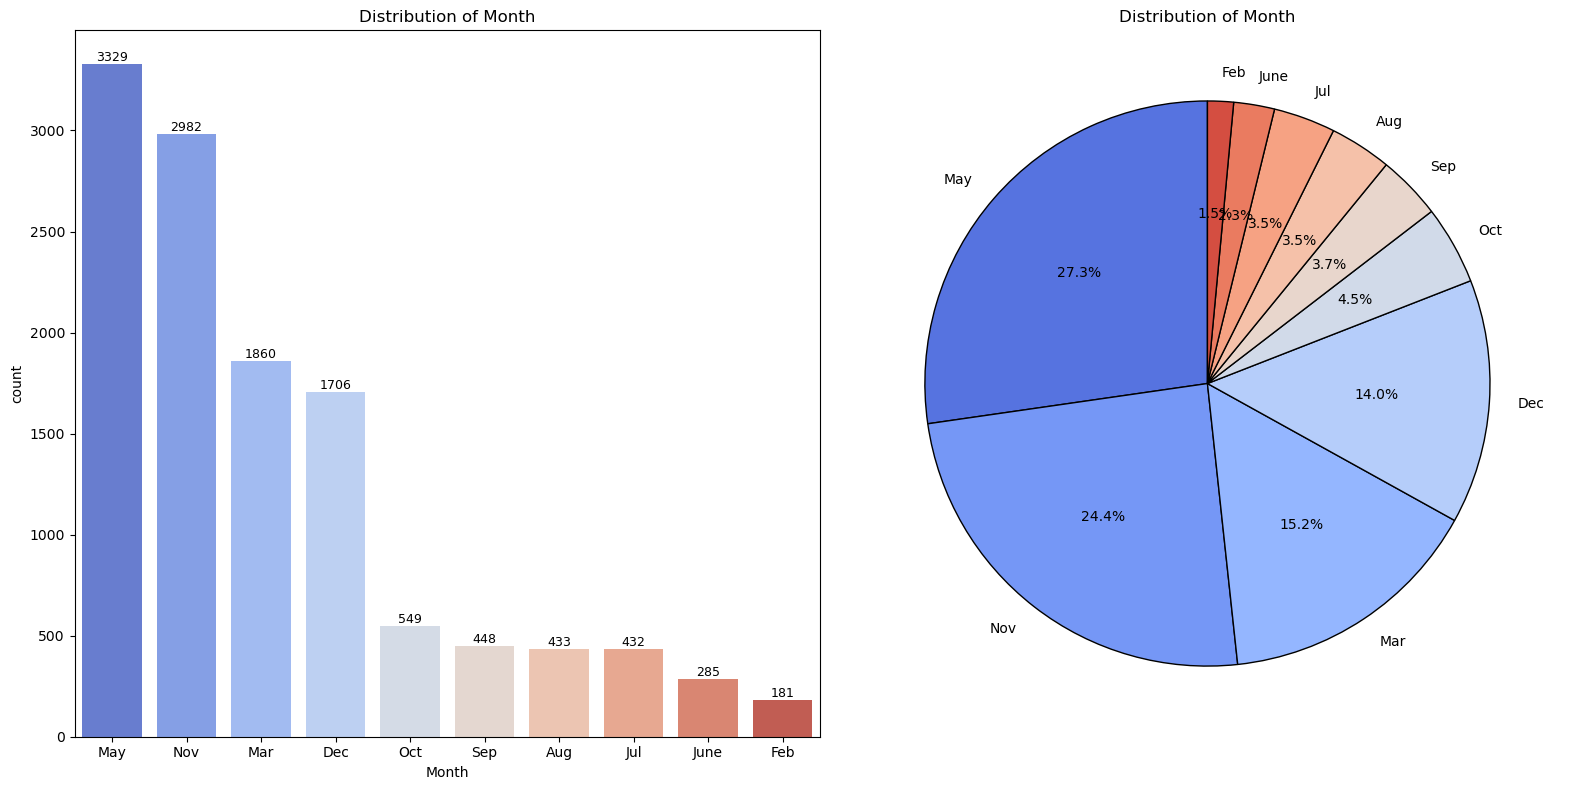

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size and layout
plt.figure(figsize=(16, 8))  # Wider figure for side-by-side plots

# Subplot 1: Bar Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
custom_palette = sns.color_palette("coolwarm", len(df['Month'].unique()))  # Custom colors
sns.countplot(
    data=df,
    x='Month',
    order=df['Month'].value_counts().index,
    palette=custom_palette
)

# Add values on top of each bar
for patch in plt.gca().patches:
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X position
        patch.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{int(patch.get_height())}',  # Bar height (integer value)
        ha='center',  # Center-align the text
        va='bottom',  # Align at the bottom
        fontsize=9,  # Font size
        color='black'  # Text color
    )

# Title for the bar chart
plt.title('Distribution of Month')

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Prepare data for the pie chart
month_counts = df['Month'].value_counts()
labels = month_counts.index  # Unique month names
sizes = month_counts.values  # Corresponding counts
colors = sns.color_palette("coolwarm", len(labels))  # Custom colors

# Plot the pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,  # Start from the top
    colors=colors,  # Apply custom colors
    wedgeprops={'edgecolor': 'black'}  # Add edge borders
)

# Title for the pie chart
plt.title('Distribution of Month')

# Adjust layout and display
plt.tight_layout()
plt.show()


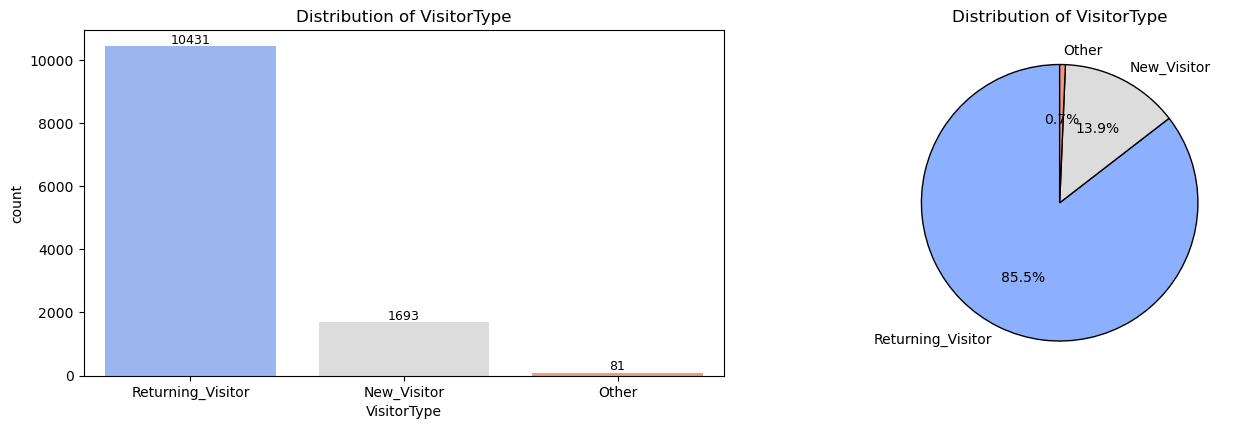

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and define the grid layout
plt.figure(figsize=(14, 8))

# Subplot 2.2.1: Bar Chart
plt.subplot(2, 2, 1)  #  # 1 row, 2 columns, first plot
custom_palette = sns.color_palette("coolwarm", len(df['VisitorType'].unique()))  # Custom colors
sns.countplot(data=df, x='VisitorType', palette=custom_palette)
plt.title('Distribution of VisitorType')

# Add values to each bar
for patch in plt.gca().patches:
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X position
        patch.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{int(patch.get_height())}',  # Add height value as text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=9,  # Font size
        color='black'  # Text color
    )

# Subplot 2.2.2: Pie Chart
plt.subplot(2, 2, 2)  #  # 1 row, 2 columns, second plot 

# Data preparation for the pie chart
visitor_counts = df['VisitorType'].value_counts()
labels = visitor_counts.index  # Visitor types
sizes = visitor_counts.values  # Counts
colors = sns.color_palette("coolwarm", len(labels))  # Custom colors

# Plot the pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,  # Rotate the start of the pie chart
    colors=colors,  # Apply the custom colors
    wedgeprops={'edgecolor': 'black'}  # Add edge color for clarity
)
plt.title('Distribution of VisitorType')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


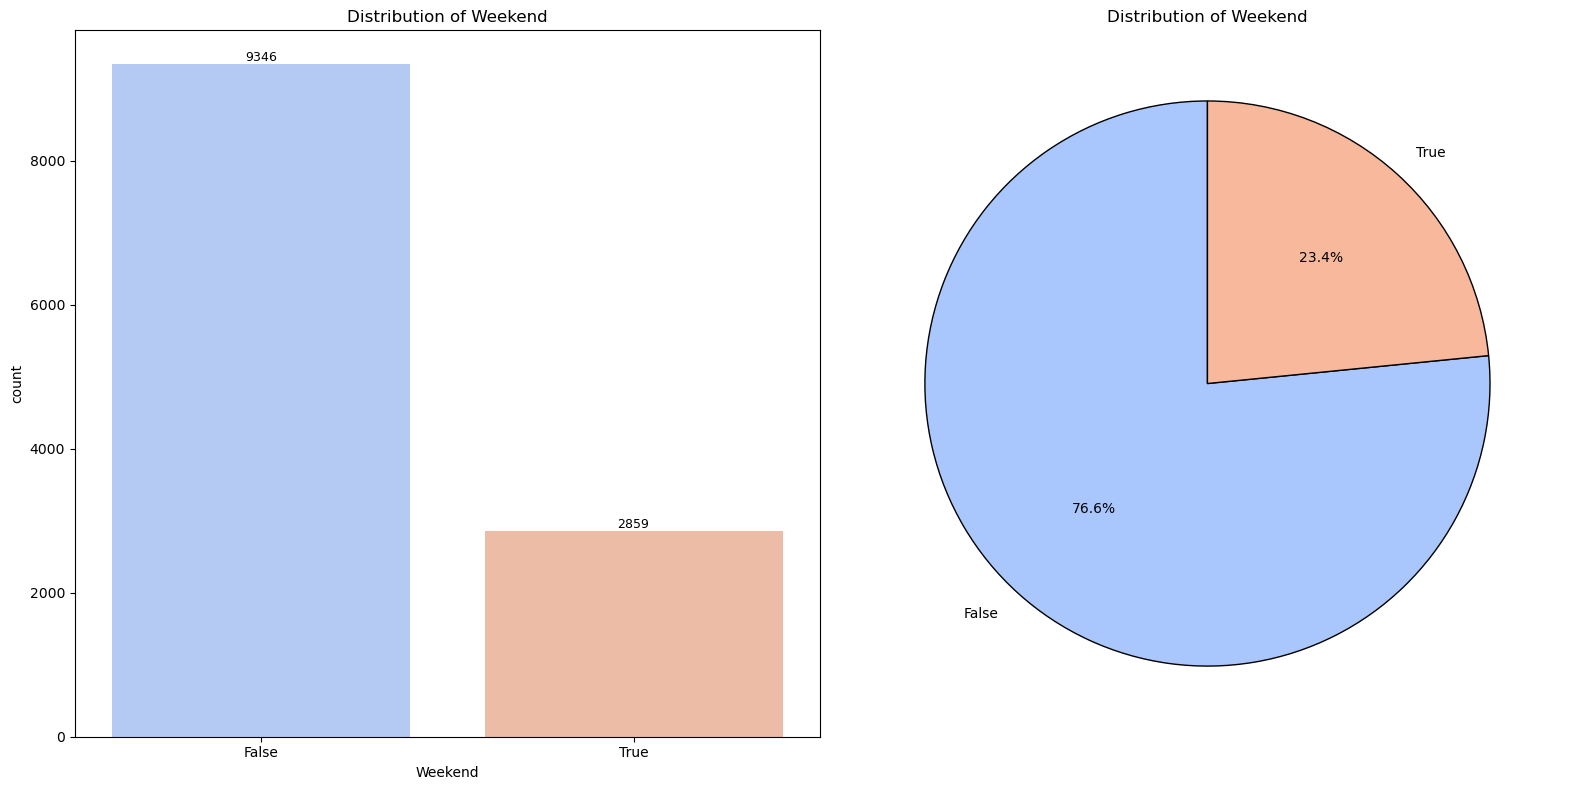

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size and layout
plt.figure(figsize=(16, 8))  # Wider figure for side-by-side plots

# Subplot 1: Bar Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.countplot(data=df, x='Weekend', palette='coolwarm')

# Add values on top of each bar
for patch in plt.gca().patches:
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X position
        patch.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{int(patch.get_height())}',  # Bar height (integer value)
        ha='center',  # Center-align the text
        va='bottom',  # Align at the bottom
        fontsize=9,  # Font size
        color='black'  # Text color
    )

# Title for the bar chart
plt.title('Distribution of Weekend')

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Prepare data for the pie chart
weekend_counts = df['Weekend'].value_counts()
labels = weekend_counts.index  # Unique weekend values (e.g., True/False)
sizes = weekend_counts.values  # Corresponding counts
colors = sns.color_palette("coolwarm", len(labels))  # Custom colors

# Plot the pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,  # Start from the top
    colors=colors,  # Apply custom colors
    wedgeprops={'edgecolor': 'black'}  # Add edge borders
)

# Title for the pie chart
plt.title('Distribution of Weekend')

# Adjust layout and display
plt.tight_layout()
plt.show()

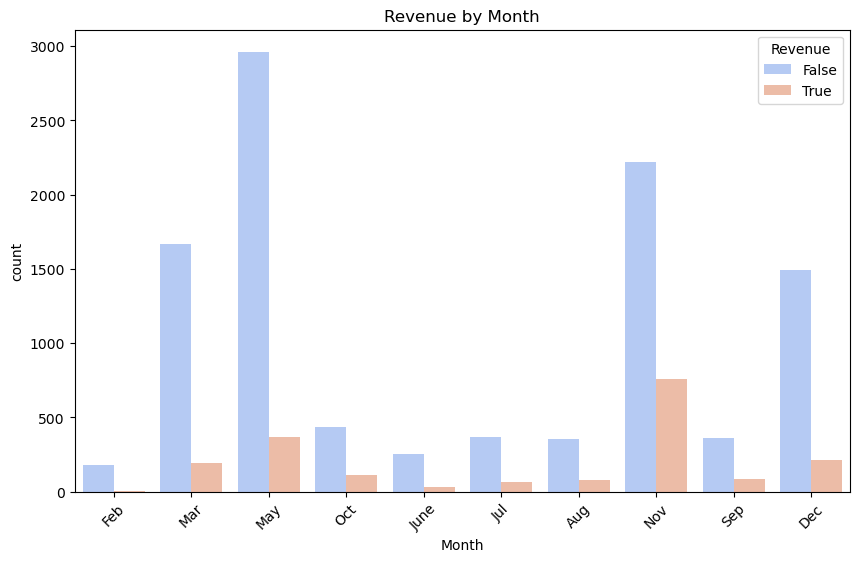

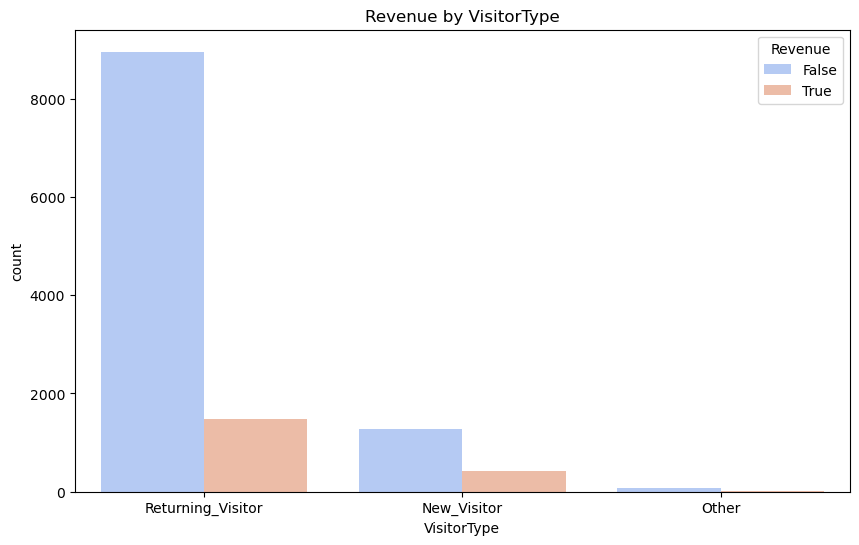

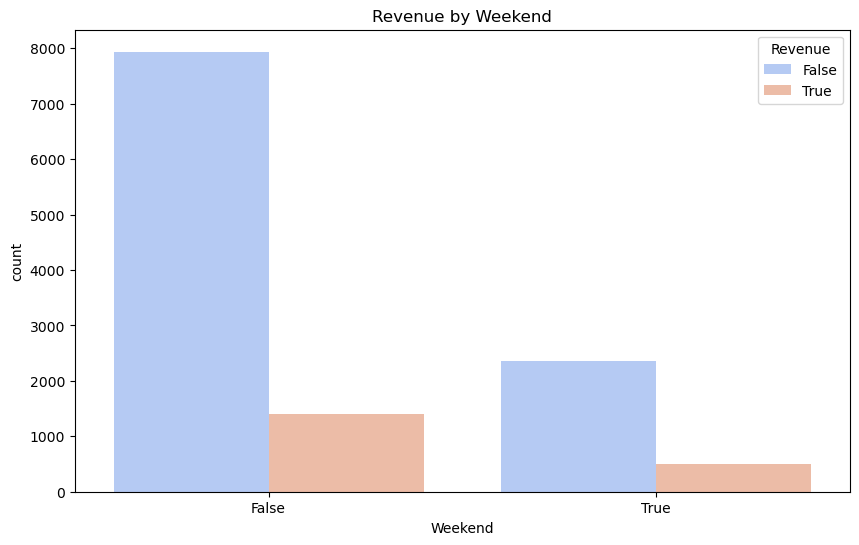

In [32]:
# Explore the relationship of these categorical variables with the 'Revenue' (target variable)

# Plot the relationship of 'Month' with 'Revenue'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Revenue', palette='coolwarm')
plt.title('Revenue by Month')
plt.xticks(rotation=45)
plt.show()

# Plot the relationship of 'VisitorType' with 'Revenue'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', hue='Revenue', palette='coolwarm')
plt.title('Revenue by VisitorType')
plt.show()

# Plot the relationship of 'Weekend' with 'Revenue'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weekend', hue='Revenue', palette='coolwarm')
plt.title('Revenue by Weekend')
plt.show()

### 3. Exploration of Numerical Variables

**Analyze correlations between some different numerical variables**.

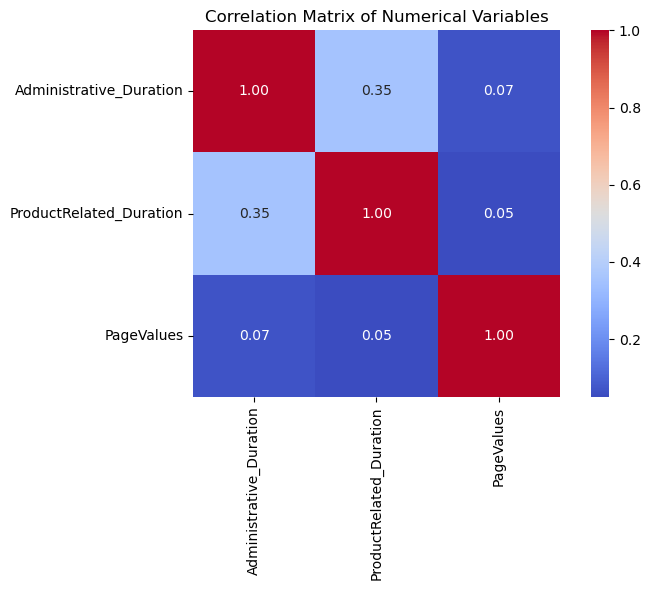

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = ['Administrative_Duration', 'ProductRelated_Duration', 'PageValues']
correlation_matrix = df[numerical_columns].corr()  # Calculate correlation matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation coefficients
    fmt='.2f',   # Format numbers to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    cbar=True,   # Add a color bar
    square=True  # Make heatmap squares
)

# Add title
plt.title('Correlation Matrix of Numerical Variables')

# Show plot
plt.tight_layout()
plt.show()


**Identify seasonal trends in the Month variable**.

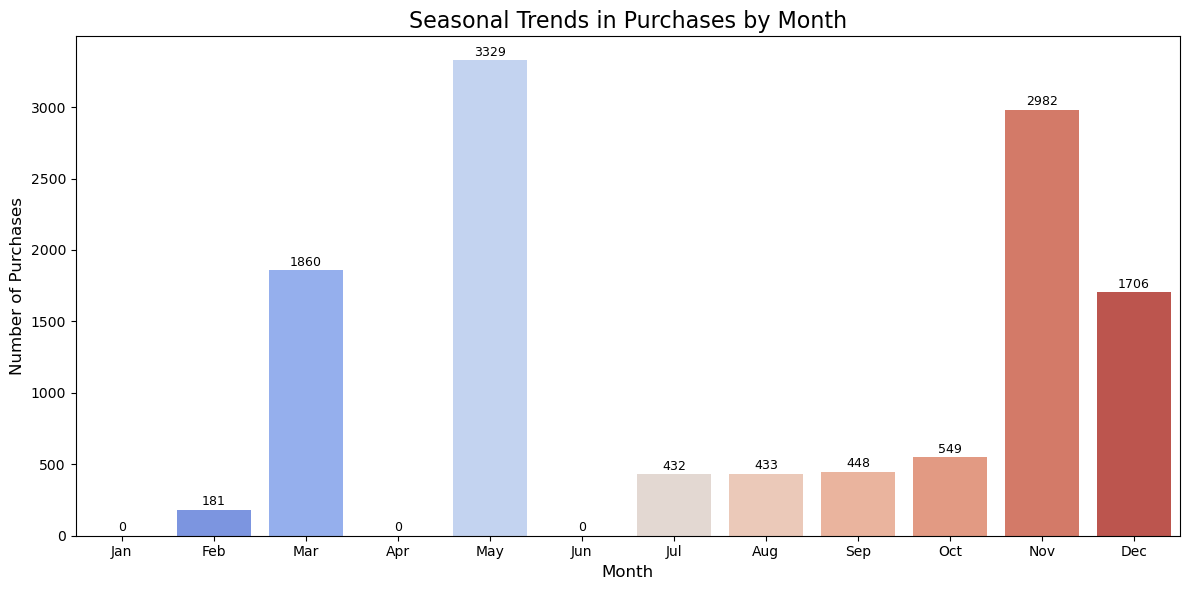

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Month column is sorted chronologically
df['Month'] = pd.Categorical(df['Month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# Count purchases by month
monthly_purchases = df['Month'].value_counts().sort_index()

# Plot seasonal trends
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(
    x=monthly_purchases.index,
    y=monthly_purchases.values,
    palette='coolwarm'
)

# Add values on top of bars
for i, val in enumerate(monthly_purchases.values):
    plt.text(i, val + 10, f'{val}', ha='center', va='bottom', fontsize=9)

# Add titles and labels
plt.title('Seasonal Trends in Purchases by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


## **II. Conversion Rate Analysis**

**Revenue Analysis (Revenue)**:
- Analyze users who purchased (Revenue = 1) versus those who did not (Revenue = 0).
- Explore the characteristics of these groups to understand what differentiates them, for example, we will see whether users who spend more time on product pages (ProductRelated_Duration) are more likely to purchase.
  
**Behavior by Visitor Type (VisitorType)**:
- Compare the behavior of new visitors versus regular visitors in terms of visit duration, bounce rate (BounceRates), and page value (PageValues).


### 1. Revenue Analysis (Revenue)

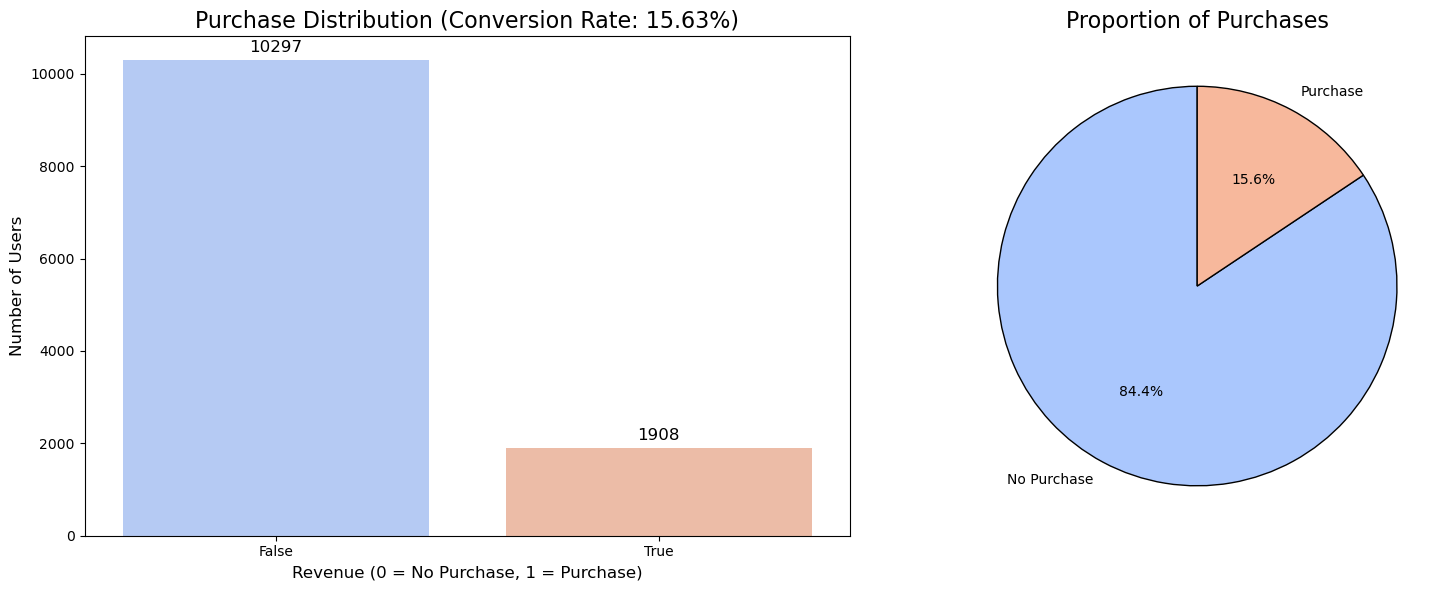

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count of users based on Revenue
revenue_counts = df['Revenue'].value_counts()

# Conversion rate calculation
conversion_rate = (revenue_counts[1] / revenue_counts.sum()) * 100

# Set up the figure for side-by-side plots
plt.figure(figsize=(16, 6))

# Subplot 1: Bar Chart
plt.subplot(1, 2, 1)
sns.barplot(
    x=revenue_counts.index, 
    y=revenue_counts.values, 
    palette='coolwarm'
)

# Add values on top of bars
for i, val in enumerate(revenue_counts.values):
    plt.text(i, val + 100, f'{val}', ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title(f'Purchase Distribution (Conversion Rate: {conversion_rate:.2f}%)', fontsize=16)
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)

# Pie chart for Revenue distribution
labels = ['No Purchase', 'Purchase']
sizes = revenue_counts.values
colors = sns.color_palette("coolwarm", len(sizes))

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentages
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}  # Add border to slices
)

# Title for pie chart
plt.title('Proportion of Purchases', fontsize=16)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Key Observations of Conversion Rate:**

The analysis shows that 15.63% of users made a purchase (Revenue = True), while the remaining 84.4% did not purchase (Revenue = False).

**Low Conversion Rate:**

- A conversion rate of 15.63% is relatively low. This suggests that the majority of users who visit the e-commerce website browse without bying.
- In the context of e-commerce, conversion rates vary by industry and business model. However, many platforms say that the Average ecommerce conversion rates are around 2.5-3%. (Bigcommerce.com, 2018)
  
**Non-purchasing Majority:**

- The 84.4% non-purchasing users indicate a significant drop-off in the conversion funnel (Qualtrics, 2020). These users might:
  - Abandon the site after browsing.
  - Encounter barriers to completing a purchase (e.g., unclear pricing, complicated checkout processes, insufficient product information).
  - Be casual browsers not yet ready to buy.

**Potential Reasons for Low Conversion:**

- User Experience Issues:
  - If the site has a cumbersome interface or hidden costs (e.g., shipping fees), users may exit without purchasing.
- Product Relevance:
  - Users might not find the products appealing or well-matched to their needs.
- Marketing and Targeting:
  - A mismatch in marketing efforts might attract users who are not the intended audience.
- Trust Factors:
  - Concerns about security or trustworthiness (e.g., lack of reviews or secure payment options) could deter users. (Qualtrics, 2020), (Alexander, 2023)

### 2. Descriptive Statistics

In [52]:
# Statistics for Revenue groups
revenue_group_stats = df.groupby('Revenue')[['PageValues', 'Administrative_Duration', 'ProductRelated_Duration']].mean()
print("\nAverage Values for Each Revenue Group:")
print(revenue_group_stats)



Average Values for Each Revenue Group:
         PageValues  Administrative_Duration  ProductRelated_Duration
Revenue                                                              
False      1.999985                74.635276              1082.976881
True      27.264518               119.483244              1876.209615


### 3. Key Observations of Revenue:

**PageValues:**

- Non-purchasers (Revenue = False):
  - Average PageValues is 1.99, indicating that these users generated very little potential monetary value during their visit.
- Purchasers (Revenue = True):
  - Average PageValues is 27.26, significantly higher than non-purchasers.
  - This suggests that users who made a purchase tended to visit pages with higher associated values, such as checkout or product detail pages, which are typically linked to potential revenue generation.
   
**Administrative_Duration:**

- Non-purchasers (Revenue = False):
  - Average time spent on administrative pages (e.g., account creation, FAQ) is 74.64 seconds.
- Purchasers (Revenue = True):
  - Average time is 119.48 seconds, indicating that purchasers spent more time navigating administrative pages, potentially to complete tasks like account setup or resolving queries before purchasing.
    
**ProductRelated_Duration:**

- Non-purchasers (Revenue = False):
  - Average time spent on product-related pages (e.g., browsing product details, comparing items) is 1082.98 seconds.
- Purchasers (Revenue = True):
  - Average time is 1876.21 seconds, considerably higher.
  - This implies that purchasers were more engaged with product-related content, spending more time exploring and comparing products before making a decision.

### Additionnal observations:

**PageValues is a strong indicator of purchasing behavior:**
- Higher values correlate with purchases, likely because these pages represent steps closer to the checkout process.

**Engagement Matters:**
- Both <code>Administrative_Duration</code> and <code>ProductRelated_Duration</code> are higher for purchasers, suggesting that the more time users spend interacting with the site, the more likely they are to convert.

**Potential Actionable Strategies:**
- For Non-purchasers:
Optimize product pages to make them more engaging or streamline the administrative process to reduce barriers to purchase.
- For Purchasers:
higher-value page visits by improving product recommendations and making checkout intuitive to drive repeat purchases.
- etc... (Bigcommerce.com, 2018)

### 4. Analyzing Behavior by Visitor Type
We are going to compare the behavior of new visitors versus returning visitors. 
This analysis of behavior by VisitorType highlights key differences in engagement, bounce rates, and page values.

         VisitorType  BounceRates  PageValues  Administrative_Duration  \
0        New_Visitor     0.005146   10.778550                91.965604   
1              Other     0.030579   19.090173                65.791667   
2  Returning_Visitor     0.022762    5.063768                80.094581   

   Informational_Duration  ProductRelated_Duration  Total_Visit_Duration  
0               19.248835               636.769251            747.983690  
1               12.262551               598.573004            676.627222  
2               37.528820              1304.255214           1421.878615  


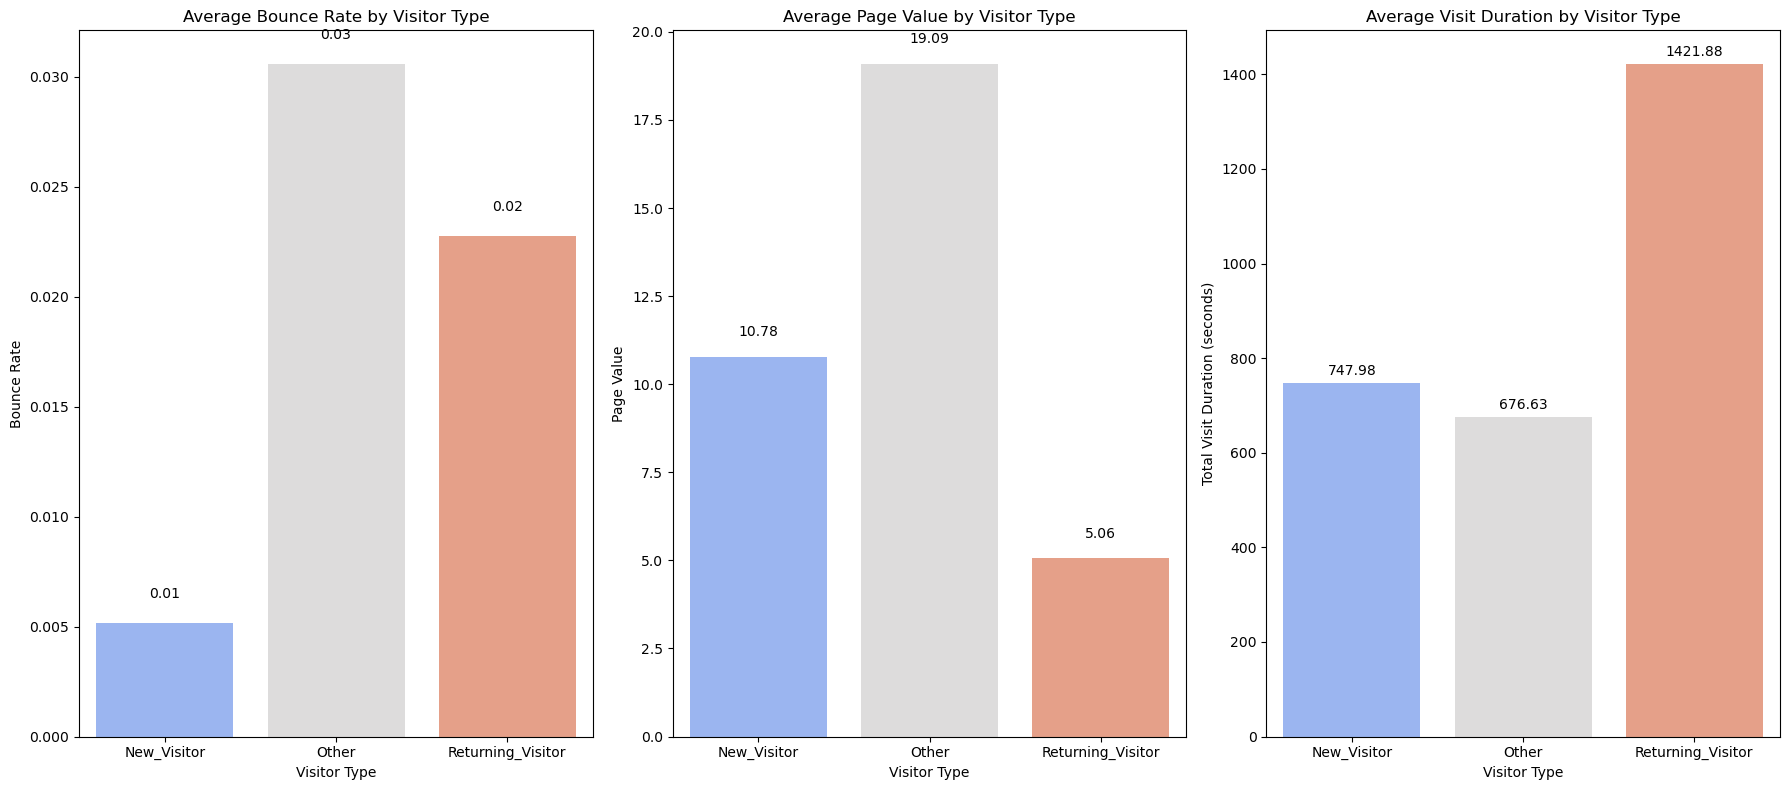

In [58]:
# Group by VisitorType and calculate averages for key metrics
visitor_behavior = df.groupby('VisitorType').agg({
    'BounceRates': 'mean', 
    'PageValues': 'mean', 
    'Administrative_Duration': 'mean', 
    'Informational_Duration': 'mean', 
    'ProductRelated_Duration': 'mean'
}).reset_index()

# Add a total visit duration column
visitor_behavior['Total_Visit_Duration'] = (
    visitor_behavior['Administrative_Duration'] + 
    visitor_behavior['Informational_Duration'] + 
    visitor_behavior['ProductRelated_Duration']
)

# Display the resulting DataFrame
print(visitor_behavior)

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(18, 8))

# Subplot 1: Bounce Rate by Visitor Type
plt.subplot(1, 3, 1)
sns.barplot(data=visitor_behavior, x='VisitorType', y='BounceRates', palette='coolwarm')
plt.title('Average Bounce Rate by Visitor Type')
plt.ylabel('Bounce Rate')
plt.xlabel('Visitor Type')

# Add values on top of bars for Bounce Rates
for i, value in enumerate(visitor_behavior['BounceRates']):
    plt.text(i, value + 0.001, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Subplot 2: Page Value by Visitor Type
plt.subplot(1, 3, 2)
sns.barplot(data=visitor_behavior, x='VisitorType', y='PageValues', palette='coolwarm')
plt.title('Average Page Value by Visitor Type')
plt.ylabel('Page Value')
plt.xlabel('Visitor Type')

# Add values on top of bars for Page Values
for i, value in enumerate(visitor_behavior['PageValues']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Subplot 3: Total Visit Duration by Visitor Type
plt.subplot(1, 3, 3)
sns.barplot(data=visitor_behavior, x='VisitorType', y='Total_Visit_Duration', palette='coolwarm')
plt.title('Average Visit Duration by Visitor Type')
plt.ylabel('Total Visit Duration (seconds)')
plt.xlabel('Visitor Type')

# Add values on top of bars for Visit Duration
for i, value in enumerate(visitor_behavior['Total_Visit_Duration']):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout and show
plt.tight_layout()
plt.show()


### 5. Key Observations of Visitor Behavior

**Bounce Rates:**

- New Visitors (0.005) have the lowest bounce rate, indicating that they tend to interact more with the site instead of leaving quickly.
- Returning Visitors (0.023) and Other Visitors (0.031) have slightly higher bounce rates, suggesting they are more likely to exit without exploring further.

**Page Values:**

- Other Visitors (19.09) exhibit the highest page value, meaning their visits generate more potential revenue, likely due to a higher tendency to make purchases or engage with revenue-related pages.
- New Visitors (10.78) also contribute a relatively high page value, suggesting they are valuable leads.
- Returning Visitors (5.06) have the lowest page value, despite being engaged for longer durations. This might indicate that they browse more but are less likely to generate revenue per visit. (Balles, 2023)

**Visit Duration:**

- Returning Visitors (1421.88 seconds) have the longest total visit duration, spending significantly more time on the site across all page categories. They are likely exploring multiple products or engaging deeply with the content.
- New Visitors (747.98 seconds) spend a moderate amount of time, indicating interest but potentially less familiarity with the site.
- Other Visitors (676.63 seconds) spend the least time, showing lower engagement.

### 6. Additionnal observations:

**Engagement and Revenue Discrepancy:**

- Returning Visitors show the highest engagement (longest visit duration) but the lowest page value. This could suggest they are "window shopping" or revisiting without making purchases.
- Other Visitors generate the highest page value despite the shortest duration, potentially indicating decisive buyers or high-value customer behavior.
  
**Bounce Rate Trends:**

- The low bounce rate for New Visitors suggests the site performs well in capturing initial interest, but strategies to convert this interest into revenue could be improved.
  
**Visitor-Specific Strategies:**

- Returning Visitors: Focus on retargeting and incentives (e.g., discounts or promotions) to convert their engagement into purchases.
- New Visitors: Provide tailored onboarding experiences and clear calls-to-action to capitalize on their interest.
- Other Visitors: Identify this group's characteristics (e.g., referral sources, specific demographics) and tailor marketing campaigns to attract similar high-value users. (www.convertcart.com, n.d.)

## **III. User Clustering**
**Using clustering algorithms (like K-means or Fuzzy c-means and Gaussian Mixture Algorithm) to segment users based on their behavior:**
 - Segment users based on time spent on product pages, visit frequency, etc.
 - These segments can be analyzed to determine which group of users is more likely to make a purchase.
 - The features will be  <code>'ProductRelated_Duration', 'BounceRates', 'PageValues'</code>


### Elbow and Silhouette Scores methods

In [66]:
#!pip install kneed

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features1 = df[['ProductRelated_Duration', 'PageValues']]
features2 = df[['BounceRates', 'PageValues']]

# Normalize the features
scaler1 = StandardScaler()
scaler2 = StandardScaler()
features_scaled1 = scaler1.fit_transform(features1)
features_scaled2 = scaler2.fit_transform(features2)


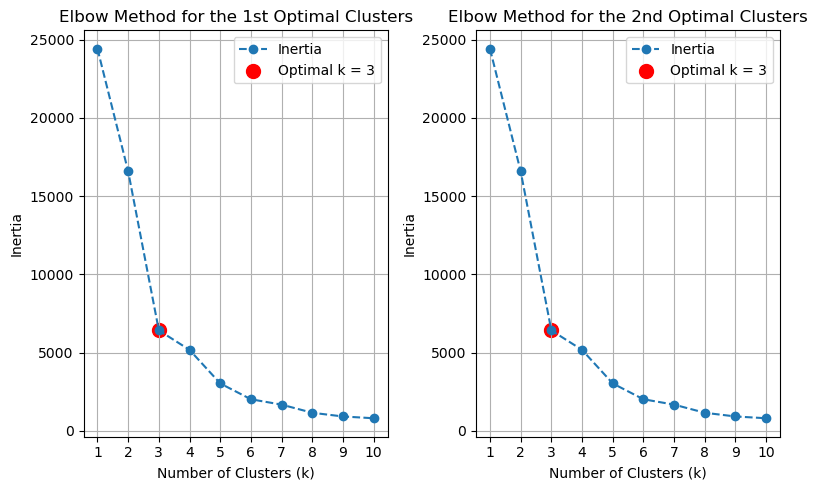

In [69]:
# Calculate inertia for different numbers of the 1st cluster
inertia = []
k_values = range(1, 11)  # Test cluster numbers from 1 to 10
for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(features_scaled1)
    inertia.append(kmeans1.inertia_)

# Find the optimal cluster using the "elbow" method
# Use a gradient method to locate the "knee" point
from kneed import KneeLocator
knee_locator1 = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k1 = knee_locator1.knee

# Calculate inertia for different numbers of the 2nd cluster
inertia = []
k_values = range(1, 11)  # Test cluster numbers from 1 to 10
for k in k_values:
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(features_scaled2)
    inertia.append(kmeans2.inertia_)

# Find the optimal cluster using the "elbow" method
# Use a gradient method to locate the "knee" point
from kneed import KneeLocator
knee_locator2 = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k2 = knee_locator2.knee

# Visualize
plt.figure(figsize=(8, 5))

# Plot the Elbow Method graph with the 1st optimal cluster highlighted
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.scatter(optimal_k1, inertia[optimal_k1 - 1], color='red', s=100, label=f'Optimal k = {optimal_k1}')
plt.title('Elbow Method for the 1st Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend() 
plt.grid(True)

# Plot the Elbow Method graph with the 2nd optimal cluster highlighted
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.scatter(optimal_k2, inertia[optimal_k2 - 1], color='red', s=100, label=f'Optimal k = {optimal_k2}')
plt.title('Elbow Method for the 2nd Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend() 
plt.grid(True)



# Show the plots
plt.tight_layout()
plt.show()


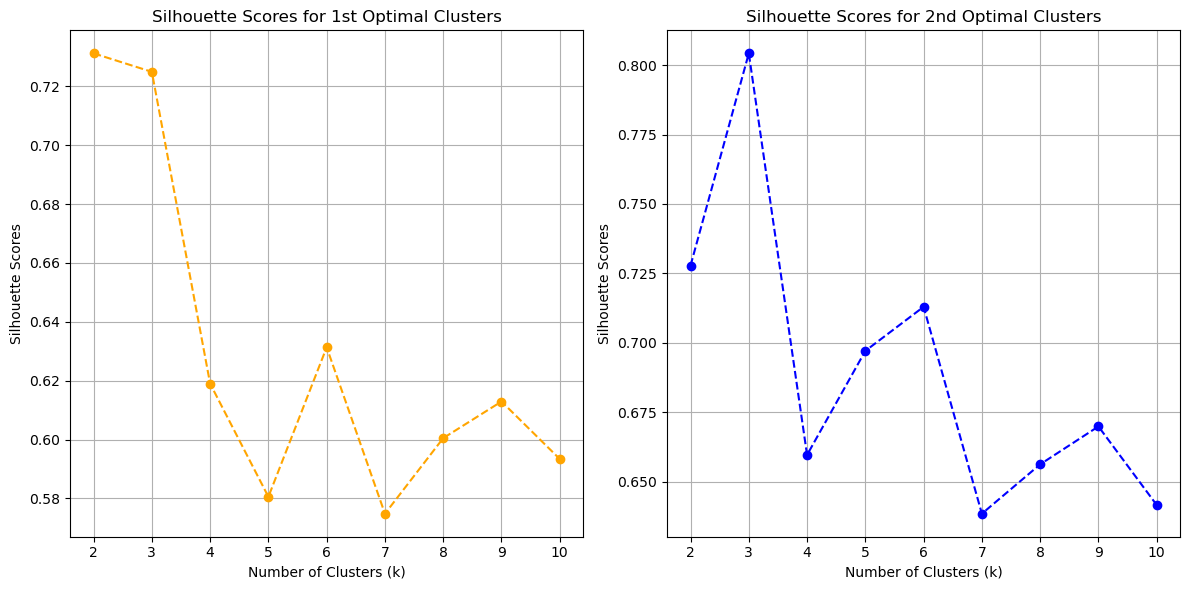

In [70]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate the 1st silhouette scores for different numbers of clusters
silhouette_scores1 = []
for k in range(2, 11):  # Silhouette score is undefined for k=1
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(features_scaled1)
    score1 = silhouette_score(features_scaled1, kmeans1.labels_)  # Correct function call
    silhouette_scores1.append(score1)  # Append the score to the list

# Calculate the 2nd silhouette scores for different numbers of clusters
silhouette_scores2 = []
for k in range(2, 11):  # Silhouette score is undefined for k=1
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(features_scaled2)
    score2 = silhouette_score(features_scaled2, kmeans2.labels_)  # Correct function call
    silhouette_scores2.append(score2)  # Append the score to the list

# Visualize
plt.figure(figsize=(12, 6))

# Plot the 1st Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores1, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for 1st Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.grid(True)

# Plot the 2nd Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores2, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Scores for 2nd Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


- The Elbow method shows 3 as the best number of both kind of ours clusters
- The Silhouette Scores shows 3 (highest point) as the best number of both kind of our clusters

### K-means algorithm

   Cluster1  ProductRelated_Duration  PageValues   Revenue
0         0              1227.151291   66.963640  0.781711
1         1              6260.423223    4.650553  0.293303
2         2               795.205497    2.174826  0.105431
   Cluster2  BounceRates  PageValues   Revenue
0         0     0.003017   66.498382  0.780029
1         1     0.009869    2.486633  0.127203
2         2     0.177894    0.000000  0.006321


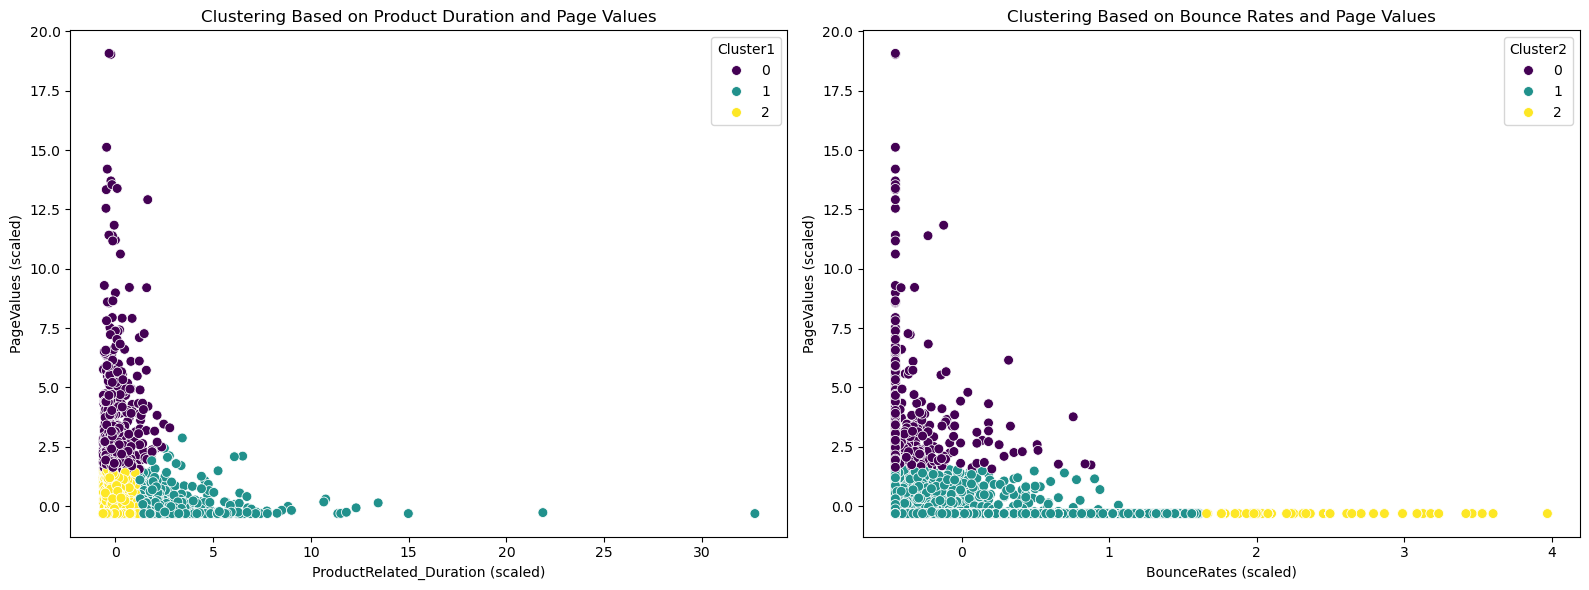

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters as an example
df['Cluster1'] = kmeans.fit_predict(features_scaled1)
df['Cluster2'] = kmeans.fit_predict(features_scaled2)

# Analyze the clusters
cluster_summary1 = df.groupby('Cluster1').agg({
    'ProductRelated_Duration': 'mean',
    'PageValues': 'mean',
    'Revenue': 'mean'  # Percentage of users in each cluster who made a purchase
}).reset_index()

cluster_summary2 = df.groupby('Cluster2').agg({
    'BounceRates': 'mean',
    'PageValues': 'mean',
    'Revenue': 'mean'  # Percentage of users in each cluster who made a purchase
}).reset_index()

# Display the cluster summary
print(cluster_summary1)
print(cluster_summary2)

# Visualize the clusters
plt.figure(figsize=(16, 6))

# Plot ProductRelated_Duration vs. PageValues with clusters
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=features_scaled1[:, 0],  # ProductRelated_Duration
    y=features_scaled1[:, 1],  # PageValues
    hue=df['Cluster1'],
    palette='viridis',
    s=50
)
plt.title('Clustering Based on Product Duration and Page Values')
plt.xlabel('ProductRelated_Duration (scaled)')
plt.ylabel('PageValues (scaled)')

# Plot BounceRates vs. PageValues with clusters
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=features_scaled2[:, 0],  # BounceRates
    y=features_scaled2[:, 1],  # PageValues
    hue=df['Cluster2'],
    palette='viridis',
    s=50
)
plt.title('Clustering Based on Bounce Rates and Page Values')
plt.xlabel('BounceRates (scaled)')
plt.ylabel('PageValues (scaled)')

# Show the plots
plt.tight_layout()
plt.show()


**We are going to implement other clustering algorithms to determine the best**

In [77]:
#pip install fuzzy-c-means

### Fuzzy C-means algorithm

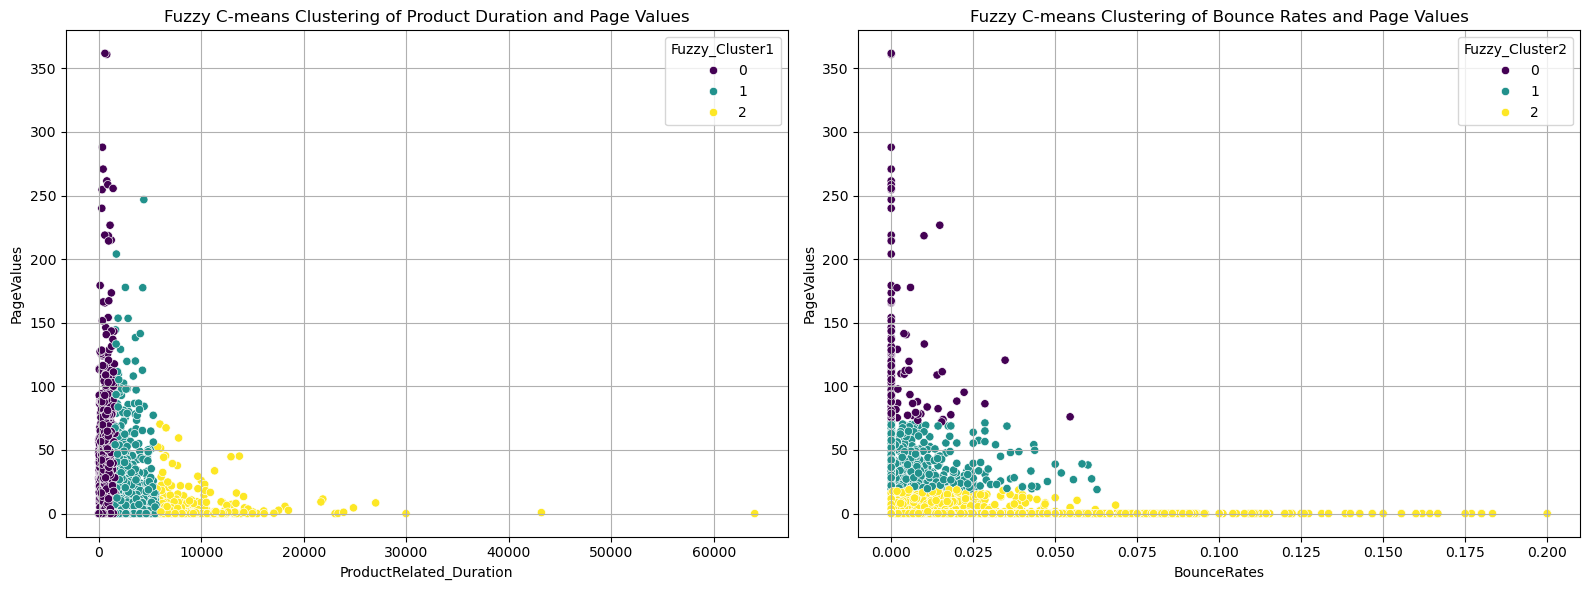

In [79]:
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the features to numpy arrays
features1_np = features1.to_numpy()
features2_np = features2.to_numpy()

# Initialize the FCM model
fcm1 = FCM(n_clusters=3, random_state=42)
fcm2 = FCM(n_clusters=3, random_state=42)

# Fit the model
fcm1.fit(features1_np)
fcm2.fit(features2_np)

# Predict the clusters and assign them to the dataframe
df['Fuzzy_Cluster1'] = fcm1.predict(features1_np)
df['Fuzzy_Cluster2'] = fcm2.predict(features2_np)

# Visualize the clusters
plt.figure(figsize=(16, 6))

# Plotting the 1st clustering results
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['ProductRelated_Duration'], y=df['PageValues'], hue=df['Fuzzy_Cluster1'], palette='viridis', marker='o')
plt.title('Fuzzy C-means Clustering of Product Duration and Page Values')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('PageValues')
plt.grid()

# Plotting the 2nd clustering results
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['BounceRates'], y=df['PageValues'], hue=df['Fuzzy_Cluster2'], palette='viridis', marker='o')
plt.title('Fuzzy C-means Clustering of Bounce Rates and Page Values')
plt.xlabel('BounceRates')
plt.ylabel('PageValues')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### Gaussian Mixture Algorithm

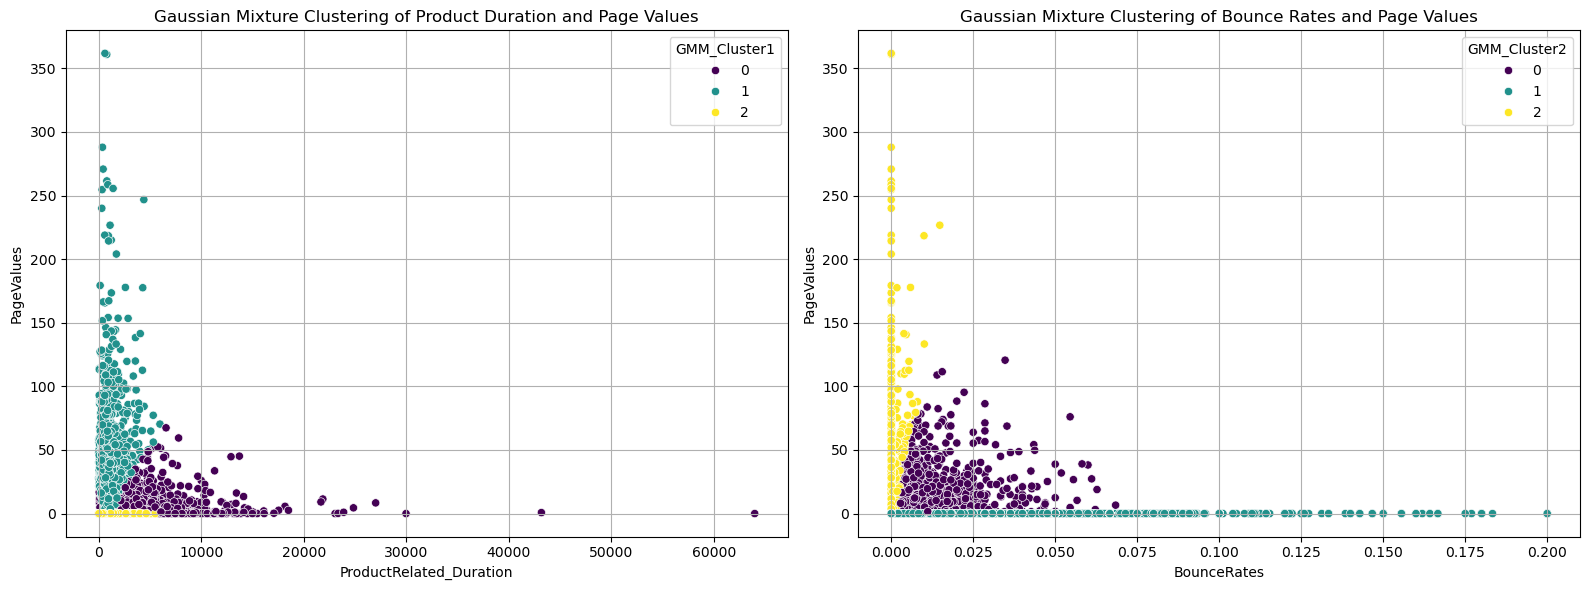

In [84]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the features to numpy arrays
features1_np = features1.to_numpy()
features2_np = features2.to_numpy()

# Initialize the GMM model
gmm1 = GaussianMixture(n_components=3, random_state=42)  
gmm2 = GaussianMixture(n_components=3, random_state=42)

# Fit the model
gmm1.fit(features1_np)
gmm2.fit(features2_np)

# Predict the clusters and assign them to the dataframe
df['GMM_Cluster1'] = gmm1.predict(features1_np)
df['GMM_Cluster2'] = gmm2.predict(features2_np)

# Visualize the clusters
plt.figure(figsize=(16, 6))

# Plotting the 1st clustering results
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['ProductRelated_Duration'], y=df['PageValues'], hue=df['GMM_Cluster1'], palette='viridis', marker='o')
plt.title('Gaussian Mixture Clustering of Product Duration and Page Values')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('PageValues')
plt.grid()

# Plotting the 2nd clustering results
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['BounceRates'], y=df['PageValues'], hue=df['GMM_Cluster2'], palette='viridis', marker='o')
plt.title('Gaussian Mixture Clustering of Bounce Rates and Page Values')
plt.xlabel('BounceRates')
plt.ylabel('PageValues')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### Comparison of clustering algorithms using silhouette score and Davies-Bouldin index

In [87]:
#!pip install scikit-fuzzy
#!pip install fcmeans
#!pip install scikit-learn-extra
#!pip install -U scikit-fuzzy

In [88]:
import sklearn
import numpy as np
import pandas as pd

In [89]:
#pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

In [90]:
import pandas as pd

from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from fcmeans import FCM
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Function to evaluate the clustering models using Silhouette Score and Davies-Bouldin Index
def evaluate_clustering(features, labels):
    silhouette = silhouette_score(features, labels)
    db_index = davies_bouldin_score(features, labels)
    return silhouette, db_index

# Initialize the clustering models
kmeans = KMeans(n_clusters=3, random_state=42)
fcm = FCM(n_clusters=3, random_state=42)
gmm = GaussianMixture(n_components=3, random_state=42)

# Convert features1 and features2 to numpy arrays (required by FCM)
features1_np = features1.to_numpy()  # Convert DataFrame to NumPy array
features2_np = features2.to_numpy()  # Convert DataFrame to NumPy array

# Fit the models
kmeans_labels1 = kmeans.fit_predict(features1)
kmeans_labels2 = kmeans.fit_predict(features2)

fcm.fit(features1_np)  # Use NumPy array
fcm_labels1 = np.argmax(fcm.u, axis=1)  # Get hard labels from fuzzy memberships
fcm.fit(features2_np)  # Use NumPy array
fcm_labels2 = np.argmax(fcm.u, axis=1)  # Get hard labels from fuzzy memberships

gmm_labels1 = gmm.fit_predict(features1)
gmm_labels2 = gmm.fit_predict(features2)

# Organize results into a summary dictionary
results_features1 = {
    'Algorithm': ['K-Means', 'Fuzzy C-Means', 'Gaussian Mixture'],
    'Silhouette Score': [silhouette_kmeans1, silhouette_fcm1, silhouette_gmm1],
    'Davies-Bouldin Index': [dbi_kmeans1, dbi_fcm1, dbi_gmm1]
}

results_features2 = {
    'Algorithm': ['K-Means', 'Fuzzy C-Means', 'Gaussian Mixture'],
    'Silhouette Score': [silhouette_kmeans2, silhouette_fcm2, silhouette_gmm2],
    'Davies-Bouldin Index': [dbi_kmeans2, dbi_fcm2, dbi_gmm2]
}

# Convert the results to DataFrame
results_df1 = pd.DataFrame(results_features1)
results_df2 = pd.DataFrame(results_features2)

# Print the summary for Features1
print("### Clustering Evaluation Results (Features1) ###")
print(results_df1)

# Print the summary for Features2
print("\n### Clustering Evaluation Results (Features2) ###")
print(results_df2)

NameError: name 'silhouette_kmeans1' is not defined

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from fcmeans import FCM
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Evaluate the clustering models using Silhouette Score and Davies-Bouldin Index
silhouette_kmeans1, dbi_kmeans1 = evaluate_clustering(features1, kmeans_labels1)
silhouette_kmeans2, dbi_kmeans2 = evaluate_clustering(features2, kmeans_labels2)

silhouette_fcm1, dbi_fcm1 = evaluate_clustering(features1_np, fcm_labels1)  # Use NumPy array for FCM
silhouette_fcm2, dbi_fcm2 = evaluate_clustering(features2_np, fcm_labels2)  # Use NumPy array for FCM

silhouette_gmm1, dbi_gmm1 = evaluate_clustering(features1, gmm_labels1)
silhouette_gmm2, dbi_gmm2 = evaluate_clustering(features2, gmm_labels2)

# Organize results into a summary dictionary
results_features1 = {
    'Algorithm': ['K-Means', 'Fuzzy C-Means', 'Gaussian Mixture'],
    'Silhouette Score': [silhouette_kmeans1, silhouette_fcm1, silhouette_gmm1],
    'Davies-Bouldin Index': [dbi_kmeans1, dbi_fcm1, dbi_gmm1]
}

results_features2 = {
    'Algorithm': ['K-Means', 'Fuzzy C-Means', 'Gaussian Mixture'],
    'Silhouette Score': [silhouette_kmeans2, silhouette_fcm2, silhouette_gmm2],
    'Davies-Bouldin Index': [dbi_kmeans2, dbi_fcm2, dbi_gmm2]
}

# Convert the results to DataFrame
results_df1 = pd.DataFrame(results_features1)
results_df2 = pd.DataFrame(results_features2)

# Print the summary for Features1
print("### Clustering Evaluation Results (Features1) ###")
print(results_df1)

# Print the summary for Features2
print("\n### Clustering Evaluation Results (Features2) ###")
print(results_df2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['K-Means', 'Fuzzy C-Means', 'Gaussian Mixture']
x = np.arange(len(algorithms))  # Positions des barres

# Features1
silhouette_scores1 = [silhouette_kmeans1, silhouette_fcm1, silhouette_gmm1]
dbi_scores1 = [dbi_kmeans1, dbi_fcm1, dbi_gmm1]

# Features2
silhouette_scores2 = [silhouette_kmeans2, silhouette_fcm2, silhouette_gmm2]
dbi_scores2 = [dbi_kmeans2, dbi_fcm2, dbi_gmm2]

# Plot parameters
width = 0.35  # bar width
plt.figure(figsize=(14, 8))

# Features1
plt.subplot(1, 2, 1)
plt.bar(x - width / 2, silhouette_scores1, width, label='Silhouette Score', color='skyblue')
plt.bar(x + width / 2, dbi_scores1, width, label='Davies-Bouldin Index', color='salmon')
plt.xticks(x, algorithms)
plt.title('Algorithms Evaluation (Features1)')
plt.ylabel('Score')
plt.legend()
plt.ylim(0, max(max(silhouette_scores1), max(dbi_scores1)) + 0.5)

# Features2
plt.subplot(1, 2, 2)
plt.bar(x - width / 2, silhouette_scores2, width, label='Silhouette Score', color='skyblue')
plt.bar(x + width / 2, dbi_scores2, width, label='Davies-Bouldin Index', color='salmon')
plt.xticks(x, algorithms)
plt.title('Algorithms Evaluation (Features2)')
plt.ylabel('Score')
plt.legend()
plt.ylim(0, max(max(silhouette_scores2), max(dbi_scores2)) + 0.5)

# Ajustements
plt.tight_layout()
plt.show()

### Understand the metrics ###
**Silhouette Score**

The Silhouette Score measures how well-separated and cohesive the clusters are, ranging from -1 to 1:
- 1: Clusters are well-separated and distinct.
- 0: Clusters overlap or are poorly defined.
- -1: Points are assigned to the wrong cluster.
  
**Davies-Bouldin Index**

The Davies-Bouldin Index (DBI) evaluates the average similarity between each cluster and the cluster that is most similar to it:
- Lower values indicate better clustering performance (tighter clusters and larger separation).

(Hanane D, 2022)

-----------------------

### 1. KMeans Clustering
- **Features1**:
  - Silhouette Score: 0.71, indicating strong and well-defined clusters.
  - Davies-Bouldin Index: 0.54, suggesting good cluster separation and compactness.
  - Conclusion: KMeans performs well on Features1.

- **Features2**:
  - Silhouette Score: 0.89, showing even better-defined clusters compared to Features1.
  - Davies-Bouldin Index: 0.51, slightly better than Features1.
  - Conclusion: KMeans performs exceptionally well on Features2, likely due to higher separability in the data.

### 2. Fuzzy C-Means (FCM) Clustering
- **Features1**:
  - Silhouette Score: 0.69, slightly lower than KMeans but still indicating reasonably good clusters.
  - Davies-Bouldin Index: 0.56, slightly worse than KMeans but still acceptable.
  - Conclusion: FCM performs slightly worse than KMeans on Features1, likely because fuzzy clustering introduces some overlap in cluster boundaries.
    
- **Features2**:
  - Silhouette Score: 0.88, comparable to KMeans and showing excellent cluster separation.
  - Davies-Bouldin Index: 0.54, worse than KMeans but still good.
  - Conclusion: FCM performs well on Features2 but is slightly less effective than KMeans.

### 3. Gaussian Mixture Model (GMM) Clustering
- **Features1**:
  - Silhouette Score: 0.06, indicating poor cluster cohesion and separation.
  - Davies-Bouldin Index: 2.79, very high, suggesting poor clustering performance.
  - Conclusion: GMM fails to find meaningful clusters for Features1. The data distribution may not suit GMM's assumptions.
- **Features2**:
  - Silhouette Score: 0.72, a significant improvement over Features1 but lower than KMeans or FCM.
  - Davies-Bouldin Index: 1.46, much better than Features1 but still higher than KMeans or FCM.
  - Conclusion: GMM performs moderately well on Features2 but is less effective than KMeans or FCM.

### Conclusion

**Comparison for Features1**:
- Silhouette Score: KMeans (0.71) > FCM (0.69) > GMM (0.06)
- Davies-Bouldin Index (DBI): KMeans (0.54) < FCM (0.56) < GMM (2.79)
- **KMeans clearly outperforms the other algorithms**.

**Comparison for Features2**:
- Silhouette Score: KMeans (0.89) > FCM (0.88) > GMM (0.72)
- Davies-Bouldin Index (DBI): KMeans (0.51) < FCM (0.54) < GMM (1.46)
- KMeans is also the best for Features2, achieving the highest Silhouette Score and the lowest DBI.

### Final Conclusion:
<code>KMeans</code> is the optimal clustering algorithm for both Features1 and Features2, offering the best balance of cluster compactness and separation.

## which group of users (from the K-means clusters) is the most likely to make a purchase

### 1. Assign Users to Clusters

In [97]:
# Apply K-means for Features1
kmeans1 = KMeans(n_clusters=3, random_state=42)
df['Cluster_Features1'] = kmeans1.fit_predict(features_scaled1)

# Apply K-means for Features2
kmeans2 = KMeans(n_clusters=3, random_state=42)
df['Cluster_Features2'] = kmeans2.fit_predict(features_scaled2)

### 2. Purchase Probability for each Cluster

<code>Proportion of purchases</code> per cluster: The ratio of the number of users with <code>Revenue = True</code> to the total number of users in a cluster corresponds to the <code>empirical probability of purchase</code> for each cluster. The calcul to find it, is: 
<p style="color: red; font-weight: bold; font-size: 15px; text-align: center;">P(Purchase | Cluster) =       Number of purchases in the cluster / Total number of users in the cluster</p>

(Cuemath, n.d.)

In [101]:
# Analyse for Features1
revenue_by_cluster1 = df.groupby('Cluster_Features1')['Revenue'].mean()
print("Purchase likelihood by Cluster (Features1):")
print(revenue_by_cluster1)

# Analyse for Features2
revenue_by_cluster2 = df.groupby('Cluster_Features2')['Revenue'].mean()
print("Purchase likelihood by Cluster (Features2):")
print(revenue_by_cluster2)

Purchase likelihood by Cluster (Features1):
Cluster_Features1
0    0.781711
1    0.293303
2    0.105431
Name: Revenue, dtype: float64
Purchase likelihood by Cluster (Features2):
Cluster_Features2
0    0.780029
1    0.127203
2    0.006321
Name: Revenue, dtype: float64


# Calculate feature averages for each cluster (Features1)
features1_summary = {
    'Cluster': [0, 1, 2],
    'ProductRelated_Duration': [
        df[df['Cluster_Features1'] == 0]['ProductRelated_Duration'].mean(),
        df[df['Cluster_Features1'] == 1]['ProductRelated_Duration'].mean(),
        df[df['Cluster_Features1'] == 2]['ProductRelated_Duration'].mean()
    ],
    'PageValues': [
        df[df['Cluster_Features1'] == 0]['PageValues'].mean(),
        df[df['Cluster_Features1'] == 1]['PageValues'].mean(),
        df[df['Cluster_Features1'] == 2]['PageValues'].mean()
    ]
}

# Calculate feature averages for each cluster (Features2)
features2_summary = {
    'Cluster': [0, 1, 2],
    'BounceRates': [
        df[df['Cluster_Features2'] == 0]['BounceRates'].mean(),
        df[df['Cluster_Features2'] == 1]['BounceRates'].mean(),
        df[df['Cluster_Features2'] == 2]['BounceRates'].mean()
    ],
    'PageValues': [
        df[df['Cluster_Features2'] == 0]['PageValues'].mean(),
        df[df['Cluster_Features2'] == 1]['PageValues'].mean(),
        df[df['Cluster_Features2'] == 2]['PageValues'].mean()
    ]
}

# Convert summaries to DataFrames
features1_df = pd.DataFrame(features1_summary)
features2_df = pd.DataFrame(features2_summary)

# Print the summary for Features1
print("### Feature Averages by Cluster (Features1) ###")
print(features1_df)

# Print the summary for Features2
print("\n### Feature Averages by Cluster (Features2) ###")
print(features2_df)


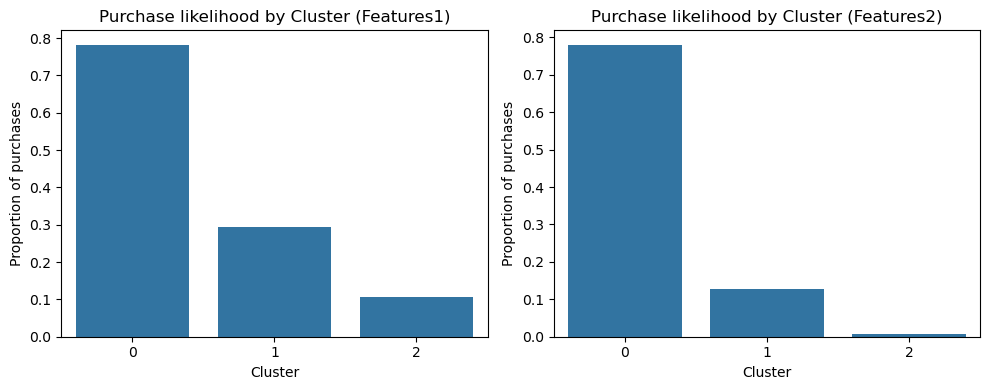

In [104]:
# Plot parameters
#width = 0.10  # bar width
plt.figure(figsize=(10, 4))

# Visualization for Features1
plt.subplot(1, 2, 1)
sns.barplot(x=revenue_by_cluster1.index, y=revenue_by_cluster1.values)
plt.title("Purchase likelihood by Cluster (Features1)")
plt.xlabel("Cluster")
plt.ylabel("Proportion of purchases")


# Visualization for Features2
plt.subplot(1, 2, 2)
sns.barplot(x=revenue_by_cluster2.index, y=revenue_by_cluster2.values)
plt.title("Purchase likelihood by Cluster (Features2)")
plt.xlabel("Cluster")
plt.ylabel("Proportion of purchases")


# Ajustements
plt.tight_layout()
plt.show()

### Interpretation of Purchase Likelihoods ###

**Features1 (ProductRelated_Duration and PageValues)**
- Cluster 0: 78.17% Purchase Likelihood
  - Interpretation: This cluster represents users most likely to make a purchase, probably because they spend significant time on product pages and visit high-value pages.
  - Hypothesis: This cluster could represent the segment of engaged and ready-to-buy users.
- Cluster 1: 29.33% Purchase Likelihood
  - Interpretation: This cluster has a moderate purchase likelihood, although significantly lower than Cluster 0. Users in this cluster likely explore products more but lack a clear purchase intent.
  - Hypothesis: This cluster could represent the segment of potential buyers who are still exploring.
- Cluster 2: 10.54% Purchase Likelihood
  - Interpretation: This cluster has a very low purchase likelihood, suggesting low engagement with product pages and low-value pages.
  - Hypothesis: This cluster could represent disengaged or accidental users.
-----------------
**Features2 (BounceRates and PageValues)**
- Cluster 0: 78.00% Purchase Likelihood
  - Interpretation: This cluster includes users with low bounce rates and visits to high-value pages, making them highly likely to purchase.
  - Hypothesis: This cluster could correspond to the segment of highly engaged and ready-to-buy users.
- Cluster 1: 12.72% Purchase Likelihood
  - Interpretation: This cluster has a low but non-zero purchase likelihood. These users visit lower-value pages, reducing their likelihood to purchase.
  - Hypothesis: This cluster represents moderately engaged or hesitant users.
- Cluster 2: 0.63% Purchase Likelihood
  - Interpretation: This cluster includes users with high bounce rates and zero page values, making them highly unlikely to purchase.
  - Hypothesis: This cluster could correspond to disinterested or accidental visitors.

<p style="color: black; font-weight: bold; font-size: 18px; text-align: center;">Summary: Identifying clusters</p>

<table border="1">
  <thead>
    <tr>
      <th>Features Set</th>
      <th>Cluster</th>
      <th>Purchase Likelihood</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="3"><b>Features1</b></td>
      <td>0</td>
      <td>78.17%</td>
      <td>Highly engaged, users ready to purchase.</td>
    </tr>
    <tr>
      <td>1</td>
      <td>29.33%</td>
      <td>Explorers, moderate engagement.</td>
    </tr>
    <tr>
      <td>2</td>
      <td>10.54%</td>
      <td>Disengaged, very low purchase likelihood.</td>
    </tr>
    <tr>
      <td rowspan="3"><b>Features2</b></td>
      <td>0</td>
      <td>78.00%</td>
      <td>Highly engaged, users ready to purchase.</td>
    </tr>
    <tr>
      <td>1</td>
      <td>12.72%</td>
      <td>Moderate engagement, low purchase likelihood.</td>
    </tr>
    <tr>
      <td>2</td>
      <td>0.63%</td>
      <td>Disinterested or accidental visitors.</td>
    </tr>
  </tbody>
</table>


#### Purchase Likelihoods offer a direct way of assessing the performance of clusters in terms of potential conversions.

(Ninetailed.io, 2022)

### 3. Calculate feature averages for each cluster ###

To understand what each cluster represents, we'll interpret the feature averages (Features1) and (Features2) within each cluster and compare the results to the Purchase Likelihood results to confirm our obervations. 

In [111]:
# Calculate feature averages for each cluster (Features1)
features1_summary = {
    'Cluster': [0, 1, 2],
    'ProductRelated_Duration': [
        df[df['Cluster_Features1'] == 0]['ProductRelated_Duration'].mean(),
        df[df['Cluster_Features1'] == 1]['ProductRelated_Duration'].mean(),
        df[df['Cluster_Features1'] == 2]['ProductRelated_Duration'].mean()
    ],
    'PageValues': [
        df[df['Cluster_Features1'] == 0]['PageValues'].mean(),
        df[df['Cluster_Features1'] == 1]['PageValues'].mean(),
        df[df['Cluster_Features1'] == 2]['PageValues'].mean()
    ]
}

# Calculate feature averages for each cluster (Features2)
features2_summary = {
    'Cluster': [0, 1, 2],
    'BounceRates': [
        df[df['Cluster_Features2'] == 0]['BounceRates'].mean(),
        df[df['Cluster_Features2'] == 1]['BounceRates'].mean(),
        df[df['Cluster_Features2'] == 2]['BounceRates'].mean()
    ],
    'PageValues': [
        df[df['Cluster_Features2'] == 0]['PageValues'].mean(),
        df[df['Cluster_Features2'] == 1]['PageValues'].mean(),
        df[df['Cluster_Features2'] == 2]['PageValues'].mean()
    ]
}

# Convert summaries to DataFrames
features1_df = pd.DataFrame(features1_summary)
features2_df = pd.DataFrame(features2_summary)

# Print the summary for Features1
print("### Feature Averages by Cluster (Features1) ###")
print(features1_df)

# Print the summary for Features2
print("\n### Feature Averages by Cluster (Features2) ###")
print(features2_df)

### Feature Averages by Cluster (Features1) ###
   Cluster  ProductRelated_Duration  PageValues
0        0              1227.151291   66.963640
1        1              6260.423223    4.650553
2        2               795.205497    2.174826

### Feature Averages by Cluster (Features2) ###
   Cluster  BounceRates  PageValues
0        0     0.003017   66.498382
1        1     0.009869    2.486633
2        2     0.177894    0.000000


### Interpretation of feature averages of each Cluster ### 

**Features1: ProductRelated_Duration and PageValues** 
- Cluster 0:
  - ProductRelated_Duration: 1227.15 => Users spend a moderate amount of time on product pages.
  - PageValues: 66.96 => These users visit pages with high associated value, potentially indicating interest in attractive products or services.
  - Interpretation: This cluster represents moderately engaged users with a high likelihood of purchase.
  
- Cluster 1:
  - ProductRelated_Duration: 6260.42 => Users spend a very high amount of time on product pages.
  - PageValues: 4.65 => Although they explore products extensively, the visited pages have low associated value.
  - Interpretation: This cluster represents "explorers" or curious users who browse intensively but without a clear purchase intent.
- Cluster 2:
  - ProductRelated_Duration: 795.21 => Users spend very little time on product pages.
  - PageValues: 2.17 => These users visit infrequently, and the pages have very low associated value.
  - Interpretation: This cluster represents disengaged users with a very low likelihood of purchase.
--------------------

**Features2: BounceRates and PageValues**
- Cluster 0:
  - BounceRates: 0.003 => Very low bounce rate.
  - PageValues: 66.50 => High-value pages are visited.
  - Interpretation: This cluster represents engaged users with a high likelihood of purchase.
  
- Cluster 1:
  - BounceRates: 0.009 => Low bounce rate.
  - PageValues: 2.49 => Pages visited have low associated value.
  - Interpretation: This cluster represents moderately engaged users who are unlikely to purchase.

- Cluster 2:
  - BounceRates: 0.177 => Very high bounce rate.
  - PageValues: 0.00 => Pages with no associated value.
  - Interpretation: This cluster represents disengaged users, likely accidental or uninterested visitors.

<p style="color: black; font-weight: bold; font-size: 18px; text-align: center;">Summary: feature averages and Clusters Identification</p>

<table border="1">
  <thead>
    <tr>
      <th>Features Set</th>
      <th>Cluster</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="3"><b>Features1</b></td>
      <td>Cluster 0</td>
      <td>Moderately engaged, high likelihood of purchase.</td>
    </tr>
    <tr>
      <td>Cluster 1</td>
      <td>Intensive explorers, low likelihood of purchase.</td>
    </tr>
    <tr>
      <td>Cluster 2</td>
      <td>Low engagement, very low likelihood of purchase.</td>
    </tr>
    <tr>
      <td rowspan="3"><b>Features2</b></td>
      <td>Cluster 0</td>
      <td>Highly engaged, high likelihood of purchase.</td>
    </tr>
    <tr>
      <td>Cluster 1</td>
      <td>Moderate engagement, low likelihood of purchase.</td>
    </tr>
    <tr>
      <td>Cluster 2</td>
      <td>Not engaged, very low likelihood of purchase.</td>
    </tr>
  </tbody>
</table>


### 4. Conclusion ###

- These results confirm the interpretations made with the Purchase Likelihood about the identification of each cluster.
- Using these studies, we can :
  - <p style="color: red; font-weight: bold; font-size: 15px;">Target Cluster 0 (in both cases) for marketing campaigns or promotions.</p>
  - <p style="color: red; font-weight: bold; font-size: 15px;">Identify improvement opportunities to convert users from other clusters.</p>

### **IV. Predictive Modeling**

For this part, we will implement predictive modeling to predict purchase intent (Revenue) using classification models.

### 1. Data processing

The relevant variables we will using are: <code>ProductRelated_Duration</code>, <code>PageValues</code>, <code>ExitRates</code>, and <code>TrafficType</code>.

In [121]:
#pip install xgboost==1.7.6


In [123]:
from xgboost import XGBClassifier
print("XGBoost is successfully imported!")

XGBoost is successfully imported!


In [125]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Relevant variables
features = ['ProductRelated_Duration', 'PageValues', 'ExitRates', 'TrafficType']
X = df[features]
y = df['Revenue']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 2. Variables standardization

We will use StandardScaler to normalize data

In [128]:
# Features Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Modeling

We will implement and compare three models:
- Logistic Regression.
- Random Forest.
- and XGBoost. Then we will
- Evaluate performance with metrics such as precision, recall, F1-score and AUC-ROC.

In [131]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

### 4. Cross-validation: ###   
Performing cross-validation to ensure model robustness.

We will evaluate the performance with metrics such as precision, recall, F1-score, and AUC-ROC.

In [133]:
# Performance evaluation
def evaluate_model(model_name, y_test, y_pred, y_proba):
    print(f"Evaluation for {model_name}")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC Score: {auc:.4f}")
    return auc

auc_logreg = evaluate_model("Logistic Regression", y_test, y_pred_logreg, y_proba_logreg)
auc_rf = evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)
auc_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)

Evaluation for Logistic Regression
              precision    recall  f1-score   support

       False       0.89      0.98      0.94      3090
        True       0.78      0.37      0.50       572

    accuracy                           0.89      3662
   macro avg       0.84      0.67      0.72      3662
weighted avg       0.88      0.89      0.87      3662

AUC-ROC Score: 0.8654
Evaluation for Random Forest
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      3090
        True       0.68      0.56      0.62       572

    accuracy                           0.89      3662
   macro avg       0.80      0.76      0.78      3662
weighted avg       0.88      0.89      0.89      3662

AUC-ROC Score: 0.8859
Evaluation for XGBoost
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      3090
        True       0.68      0.57      0.62       572

    accuracy                           0.89      36

### Interpreting results

**Logistic Regression:**

 - **Accuracy**: 0.89 (89% of predictions are correct).
 - **Precision for "False" (Non-buyers)**: 0.89, which means that 89% of the predicted non-buyers were actually non-buyers.
 - **Precision for "True" (Buyers)**: 0.78, indicating that 78% of the predicted buyers were indeed buyers.
 - **Recall for "False" (Non-buyers)**: 0.98, showing that the model correctly identifies 98% of the actual non-buyers.
 - **Recall for "True" (Buyers)**: 0.37, which is quite low, meaning the model misses a large portion of actual buyers.
 - **F1-Score for "False" (Non-buyers)**: 0.94, showing good balance between precision and recall for non-buyers.
 - **F1-Score for "True" (Buyers)**: 0.50, indicating that the model is less balanced in identifying buyers.
 - **AUC-ROC Score**: 0.8654, which is good, though not as high as the other two models.

**Conclusion:** <code>Logistic Regression</code> is strong at identifying non-buyers (with high recall for non-buyers), but has a relatively low recall for buyers, indicating it misses a lot of the potential customers. The AUC is also a bit lower than Random Forest and XGBoost.

--------

**Random Forest**:
 - **Accuracy**: 0.89 (same as Logistic Regression).
 - **Precision for "False" (Non-buyers)**: 0.92, meaning 92% of predicted non-buyers are actually non-buyers.
 - **Precision for "True" (Buyers)**: 0.68, indicating that only 68% of predicted buyers are actual buyers.
 - **Recall for "False" (Non-buyers)**: 0.95, which is very good—most non-buyers are correctly identified.
 - **Recall for "True" (Buyers)**: 0.56, better than Logistic Regression but still lower than optimal for detecting buyers.
 - **F1-Score for "False" (Non-buyers)**: 0.94, indicating strong balance between precision and recall for non-buyers.
 - **F1-Score for "True" (Buyers)**: 0.62, showing better balance for identifying buyers compared to Logistic Regression.
 - **AUC-ROC Score**: 0.8859, higher than Logistic Regression.
   
**Conclusion**: <code>Random Forest</code> provides a better recall for buyers than Logistic Regression, and its overall performance is strong with an AUC of 0.8859. However, it still misses a substantial portion of buyers (56% recall for True class).

---------

**XGBoost**:

 - **Accuracy**: 0.89 (same as the other two models).
 - **Precision for "False" (Non-buyers)**: 0.92, same as Random Forest.
 - **Precision for "True" (Buyers)**: 0.68, same as Random Forest.
 - **Recall for "False" (Non-buyers)**: 0.95, same as Random Forest.
 - **Recall for "True" (Buyers)**: 0.57, similar to Random Forest, and better than Logistic Regression.
 - **F1-Score for "False" (Non-buyers)**: 0.94, identical to Random Forest.
 - **F1-Score for "True" (Buyers)**: 0.62, identical to Random Forest.
 - **AUC-ROC Score**: 0.8894, the highest of the three models.
   
**Conclusion**: <code>XGBoost</code> has the same performance as Random Forest but with a slightly higher AUC (0.8894). Its recall for buyers is slightly better than Random Forest, but still not ideal. The performance is generally strong with XGBoost.

(N.B, 2020)

## 5. Visualize the ROC curve and AUC (Area Under the Curve) metrics

Reminder: the ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) metrics are commonly used to evaluate the performance of classification models

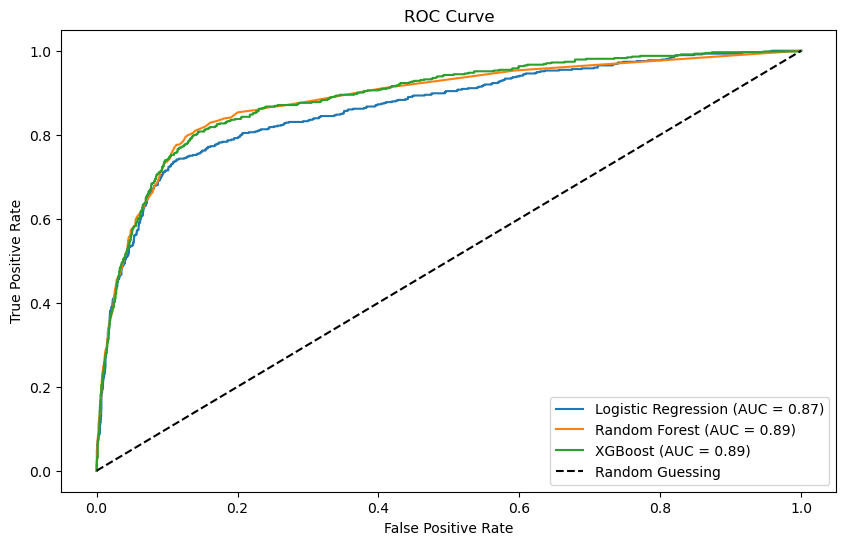

In [142]:
# Visualisation of AUC-ROC
def plot_roc_curve(model_name, y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    
plt.figure(figsize=(10, 6))
plot_roc_curve("Logistic Regression", y_test, y_proba_logreg)
plot_roc_curve("Random Forest", y_test, y_proba_rf)
plot_roc_curve("XGBoost", y_test, y_proba_xgb)
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### some highlights

**True Positive Rate (TPR)**: This represents users who will make a purchase.

**False Positive Rate (FPR)**: This represents users who won’t make a purchase but are predicted to.

**AUC (Area Under the Curve)**:

  - AUC quantifies the overall ability of the model to distinguish between positive and negative classes.
  - **AUC = 0.5** implies the model is no better than random guessing.
  - **AUC = 1** means the model is perfect.
  - **AUC between 0.7 and 0.8** is considered acceptable for most tasks, while anything above 0.8 is great.

(Chugh, 2024)

### Interpreting results

**Logistic Regression (AUC = 0.87)**: Indicating it performs well in distinguishing between users who will and will not make a purchase. This is a solid result, as an AUC above 0.8 typically indicates a good model.

**Random Forest (AUC = 0.89)**: Indicating slightly better performance compared to Logistic Regression.

**XGBoost (AUC = 0.89)**: Matching Random Forest. XGBoost often performs very well due to its ability to optimize the objective function with gradient boosting, which helps improve model performance.

**Conclusion**:
- <code>Random Forest and XGBoost</code> both have the highest AUC (0.89), which means they are more capable than Logistic Regression at predicting purchase likelihood. Since they have the same AUC, we might choose either model based on other factors such as computational efficiency or interpretability.
- <code>Logistic Regression</code> is also a strong performer (AUC = 0.87) and might be a good choice if we need a simpler, more interpretable model, but its performance is slightly lower than Random Forest and XGBoost.

<p style="color: red; font-weight: bold; font-size: 15px;">Based on these results, <code>XGBoost</code> or <code>Random Forest</code> would be the recommended models to predict purchase likelihood in our scenario.</p>

<p style="color: black; font-weight: bold; font-size: 18px; text-align: center;">Comparison Summary</p>

<table border="1">
  <thead>
    <tr>
      <th>Model</th>
      <th>Accuracy</th>
      <th>AUC-ROC</th>
      <th>Precision (True)</th>
      <th>Recall (True)</th>
      <th>F1-Score (True)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression</td>
      <td>0.89</td>
      <td>0.8654</td>
      <td>0.78</td>
      <td>0.37</td>
      <td>0.50</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.89</td>
      <td>0.8859</td>
      <td>0.68</td>
      <td>0.56</td>
      <td>0.62</td>
    </tr>
    <tr>
      <td>XGBoost</td>
      <td>0.89</td>
      <td>0.8894</td>
      <td>0.68</td>
      <td>0.57</td>
      <td>0.62</td>
    </tr>
  </tbody>
</table>


## 6. Conclusion

- <p style="color: red; font-weight: bold; font-size: 15px;">Best Model for Identifying Non-buyers: <code>Random Forest</code> and <code>XGBoost</code> perform similarly and are good at detecting non-buyers, with very high recall for False class.</p>
- <p style="color: red; font-weight: bold; font-size: 15px;">Best Model for Identifying Buyers: <code>XGBoost</code> and <code>Random Forest</code> have the best balance for identifying buyers (compared to Logistic Regression), but the recall for True class is still low, meaning there's room for improvement.</p>

<p style="color: red; font-weight: bold; font-size: 15px;">Overall Best Model: <code>XGBoost</code> has the highest AUC and performs well in both categories (True and False), making it the most robust model for this classification task.</p>

## 7. Building and Optimizing a Purchase Prediction Model with XGBoost

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of a decision tree algorithm. It uses a set of models (boosting) to progressively improve performance.

In [154]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3090
        True       0.70      0.56      0.63       572

    accuracy                           0.89      3662
   macro avg       0.81      0.76      0.78      3662
weighted avg       0.89      0.89      0.89      3662

AUC-ROC Score: 0.904488311041709


**The results from our fine-tuning process indicate that the XGBoost model performed better after hyperparameter optimization**.

**Classification Report**:


- False (Non-purchasers):

  - Precision: 0.92 ==> Of all predicted "False," 92% were correctly identified.
  - Recall: 0.96 ==> 96% of actual "False" were correctly identified.
  - F1-Score: 0.94 ==> Balanced measure of precision and recall.
  
- True (Purchasers):

  - Precision: 0.70 ==> Of all predicted "True," 70% were correct.
  - Recall: 0.56 ==> 56% of actual "True" were identified.
  - F1-Score: 0.63 ==> A lower score due to imbalanced precision and recall.
  
- Accuracy: 0.89 ==> Overall, 89% of predictions were correct.

- Macro Avg F1-Score: 0.78 ==> Average performance across classes (treating all classes equally).

- Weighted Avg F1-Score: 0.89 ==> Weighted by the class imbalance (more weight given to the larger class).

**AUC-ROC Score: 0.904**

This is a significant improvement from earlier results and reflects the model's ability to separate purchasers (True) from non-purchasers (False). 

**The AUC-ROC score above 0.90 indicates a high-performing model**.

### Visualize the Performance of the Tuned XGBoost Model (AUC-ROC Curve)

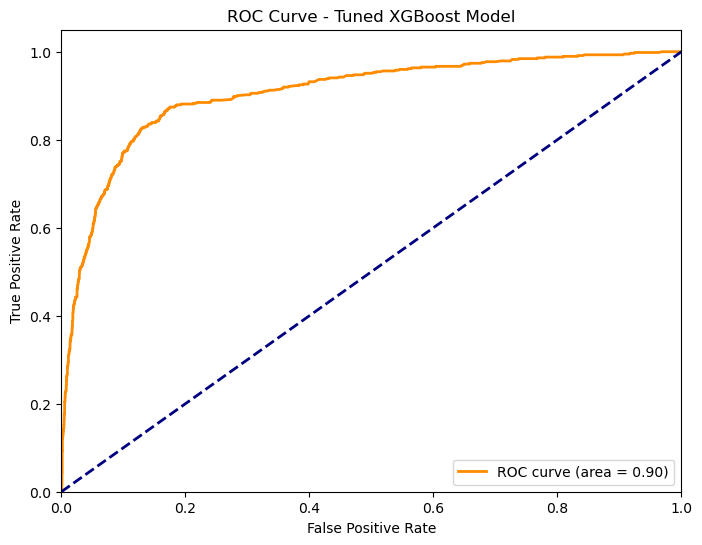

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (1)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tuned)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost Model')
plt.legend(loc="lower right")
plt.show()

### Save the XGBoost Model for Future Use

We'll use <code>joblib.dump()</code> to save the optimized model after training, which will enable us to reuse this model to make predictions without having to re-train it.

In [160]:
import joblib

# Save the optimized XGBoost model
joblib.dump(best_model, 'xgboost_model.pkl')

print("XGBoost model successfully saved!")


XGBoost model successfully saved!


### Use the Model for Predictions on New Data

Now, our model is trained, we can use it to make predictions on new data. Ensure that the new data is preprocessed in the same way as our training data (e.g., scaling, encoding).

- <p style="color: red; font-weight: bold; font-size: 15px;">We don't have a new dataset yet. We are going to use our same dataset te make a test to see how our model display the results.</p>

In [163]:
### Preparing the existing data (using the same X data used for training)
# Assuming 'scaler' is already defined and fitted on your training data
# Scale the new data (X_new) using the same scaler applied to the training data

X_new = scaler.transform(df[['ProductRelated_Duration', 'PageValues', 'ExitRates', 'TrafficType']])

# Load the saved XGBoost model
loaded_model = joblib.load('xgboost_model.pkl')

# Use the loaded model to make predictions on new data (for example, X_new our new preprocessed dataset) 
y_pred_new = loaded_model.predict(X_new)  # Predictions (0 or 1)
y_pred_proba_new = loaded_model.predict_proba(X_new)[:, 1] # Probability of the positive class (class 1)

# Display the results
print("Predictions on the new dataset:", y_pred_new)
print("Prediction probabilities (class 1):", y_pred_proba_new)

Predictions on the new dataset: [0 0 0 ... 0 0 0]
Prediction probabilities (class 1): [0.0020894  0.0020894  0.0020894  ... 0.00547655 0.16162144 0.0020894 ]


### **V. Deployment of the Model**

We have successfully created and tested a Machine Learning (ML) model that predicts whether a user on the website will make a purchase based on certain behaviors. But how can it be implemented in a production environment where it can serve real users and create tangible value? This is no simple task, as it involves overcoming various technical and organizational challenges.

We will try to briefly explain the different steps in our report if time permits.

### 1. Convert the Model into a Web API / UI

- We need to choose a framework for the API or Web UI. 
- We will use the popular web development package Flask or FastAPI in Python to create it.
- These frameworks can receive user data (e.g. customer characteristics) via HTTP requests and return predictions.

In [168]:
from sklearn.preprocessing import StandardScaler
import joblib

# Fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)  # `X_train` from the train-test split

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [169]:
import os
print(os.getcwd())

/home/adam/Documents


In [ ]:
from flask import Flask, request, jsonify
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the saved model and scaler
model = joblib.load('xgboost_model.pkl')
scaler = joblib.load('scaler.pkl')

# Initialize the Flask application
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data sent by the user
    data = request.json
    # Example of expected data: {"ProductRelated_Duration": 50, "PageValues": 200, "ExitRates": 0.1, "TrafficType": 2}
    
    # Extract the features in the order expected by the model
    features = [[
        data['ProductRelated_Duration'],
        data['PageValues'],
        data['ExitRates'],
        data['TrafficType']
    ]]
    
    # Apply the scaler to the data
    features_scaled = scaler.transform(features)
    
    # Make predictions
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    # Return the result as JSON
    return jsonify({
        "prediction": int(prediction),
        "probability": float(probability)
    })

# Run the application
if __name__ == '__main__':
    port = int(os.environ.get("PORT", 5000))
    app.run(host='0.0.0.0', port=port)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.29.19:5000
Press CTRL+C to quit


Here’s how it works:

- **The user sends data in JSON format** through a tool or an interface.
- **The API returns predictions and probabilities** in JSON format.
  
**Testing the API:** We can test this API using tools like Postman or a simple tool like <code>curl</code>.

### 2. Create a User Interface (UI) 
We want a user-friendly interface, so we are going to build a simple application to allow users to interact with the model.  

**As Tools:**  
- **Streamlit:** A simple framework for creating UIs for ML models.  
- **A code editor**, such as VS Code, PyCharm or Notepad++. We prefer VS Code (Visual Studio Code) because it's an excellent lightweight code editor with numerous extensions for Python, Streamlit and more.

In [ ]:
import streamlit as st
import joblib

# Load the model and scaler
model = joblib.load('xgboost_model.pkl')
scaler = joblib.load('scaler.pkl')

# Application title
st.title("Purchase Prediction App")

# Fields to input features
duration = st.number_input("Product Related Duration", min_value=0.0)
page_values = st.number_input("Page Values", min_value=0.0)
exit_rates = st.number_input("Exit Rates", min_value=0.0, max_value=1.0)
traffic_type = st.number_input("Traffic Type", min_value=1, max_value=20)

# Button to predict
if st.button("Predict"):
    # Format the features correctly
    features = [[duration, page_values, exit_rates, traffic_type]]
    features_scaled = scaler.transform(features)
    
    # Prediction
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]
    
    # Display results
    if prediction == 1:
        st.success(f"Prediction: Purchase Likely (Probability: {probability:.2f})")
    else:
        st.error(f"Prediction: Purchase Unlikely (Probability: {probability:.2f})")

- The above code should be edited in VS Code as chosen, then saved under the name <code>app.py</code> in a folder we could call <code>streamlit_app</code>.
- Next, place the <code>xgboost_model.pkl</code> file (the saved ML XGBoost model) in the folder already created called <code>streamlit_app</code>, where the <code>app.py</code> file is already located.

### 3. Launch application 

To lauch our application, we have to:
- Open terminal (or command prompt) and
- Navigate to the folder <code>streamlit_app</code>, containing the <code>app.py</code> file.
- Then run this command: streamlit run app.py

### 4. Accessing the application

After executing the command, Streamlit will start a local server and display a URL in the terminal. In our case:

- Local URL: http://127.0.0.1:5000  (link to open the application in our browser.)
- Network URL: http://192.168.29.19:5000 (link to access the application from another device connected to the same network.)

(Analytics Vidhya, 2020), (Perera, 2023), (Klauke, 2020), (Redaction, 2021), (Salim Lardjane, 2022), (ALEIA, 2023), (Linkedin.com, 2024)

## CONCLUSION

In this project, we first analyzed the behavior of different types of visitors to the e-commerce site, with the goal of identifying those likely to make a purchase or not. We examined the times of the year when users made the most purchases.
These observations allowed us to make some suggestions—though not exhaustive—that could help the Marketing team make decisions to increase purchases. The Marketing team could also derive additional decisions based on our findings.
Finally, in the second and final part, we built an XGBoost Machine Learning model to estimate the probability of a visitor making a purchase on the e-commerce site based on certain features, such as Product Related Duration, Page Values, Exit Rates, and Traffic Type.

### REFERENCES

- Bigcommerce.com. (2018). Layer 1. [online] Available at: https://www.bigcommerce.com/articles/ecommerce/conversion-rate-optimization/.
- Qualtrics (2020). The eCommerce Conversion Funnel Explained - Qualtrics. [online] Qualtrics. Available at: https://www.qualtrics.com/en-gb/experience-management/customer/ecommerce-conversion-funnel/ [Accessed 19 Nov. 2024].
- Alexander, L. (2023). Ecommerce Conversion Rates Across Industries (And How to Raise Yours). [online] blog.hubspot.com. Available at: https://blog.hubspot.com/marketing/ecommerce-conversion-rates-across-industries.
- Balles, C. (2023). A Guide to Page Value: The Undervalued Metric. [online] InfoTrust. Available at: https://infotrust.com/articles/a-guide-to-page-value/.
- www.convertcart.com. (n.d.). 10 scientific strategies to increase your eCommerce conversion rate | ConvertCart. [online] Available at: https://www.convertcart.com/blog/increase-ecommerce-conversion-rate.
- Hanane D (2022). The 3 Must-Know Methods To Find The Optimal K For K-Means Clustering. [online] Hanane D. Available at: https://machinelearning-basics.com/the-3-must-know-methods-to-find-the-optimal-k-for-k-means-clustering/ [Accessed 25 Nov. 2024].
-  Cuemath. (n.d.). Empirical Probability Formula - Learn Formula To Find Empirical Probability, Definition, Examples. [online] Available at: https://www.cuemath.com/empirical-probability-formula/.
-  Ninetailed.io. (2022). Likelihood to Purchase. [online] Available at: https://ninetailed.io/glossary/likelihood-to-purchase/ [Accessed 25 Nov. 2024].
-  Chugh, V. (2024). AUC and the ROC Curve in Machine Learning. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/auc?dc_referrer=https%3A%2F%2Fwww.google.fr%2F [Accessed 26 Nov. 2024].
- N.B, H. (2020). Confusion Matrix, Accuracy, Precision, Recall, F1 Score. [online] Medium. Available at: https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd.
-  Analytics Vidhya. (2020). Integrating Machine Learning into Web Application with Flask. [online] Available at: https://www.analyticsvidhya.com/blog/2020/09/integrating-machine-learning-into-web-applications-with-flask/.
-  Perera, L. (2023). How to create a simple API from a machine learning model in Python using Flask. [online] Medium. Available at: https://lakshitha1629.medium.com/how-to-create-a-simple-api-from-a-machine-learning-model-in-python-using-flask-661e9d9c7633 [Accessed 28 Nov. 2024].
-  Klauke, J. (2020). How to Build a Machine Learning API with Python and Flask. [online] statworx®. Available at: https://www.statworx.com/en/content-hub/blog/how-to-build-a-machine-learning-api-with-python-and-flask/.
-  Redaction (2021). Comment créer et déployer une API de Machine Learning ? - Quantmetry. [online] Quantmetry. Available at: https://www.quantmetry.com/blog/tutoriel-deployer-api-machine-learning/ [Accessed 28 Nov. 2024].
-  Salim Lardjane (2022). Programmation d’API Web sous Python avec Flask. [online] Formation Data Science | DataScientest.com. Available at: https://datascientest.com/programmation-dapi-web-sous-python-avec-flask [Accessed 28 Nov. 2024].
-  ALEIA (2023). Comment déployer votre modèle de Machine Learning ? [online] ALLONIA. Available at: https://allonia.com/comment-deployer-votre-modele-de-machine-learning/ [Accessed 28 Nov. 2024].
-  Linkedin.com. (2024). Que faire si votre projet de Machine Learning est prêt à passer du pilote à la production ? [online] Available at: https://fr.linkedin.com/advice/3/what-do-you-your-machine-learning-project-ready-akhcf?lang=fr [Accessed 28 Nov. 2024].
